# **PORTFOLIO OPTIMISATION 2019**

In [15]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import math
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import investpy as ipy
%matplotlib inline
import datetime as dt
import statsmodels.api as sm
from scipy import stats
from statsmodels import regression
from sklearn.linear_model import LinearRegression
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
today = dt.datetime.today().strftime("%d/%m/%Y")
from src import mlportfolio

In [2]:
#pd.set_option('display.max_rows', 100)
#plt.rcParams['axes.xmargin'] = 0
scaler = MinMaxScaler()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [4]:
plt.style.use(['seaborn'])

In [5]:
pd.set_option("display.max_rows", 20)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Lists of Stocks 

Here, the most up-to-date list of Kompas 100 stocks is collected from Kontan. Kompas 100 was chosen as the stocks universe as it provides a larger dataset than LQ45 or IDX30 yet manageable enough for the computational  resource available for the research in comparison to the 600+ of stocks listed on IDX.

In [6]:
lis = mlportfolio.index_list_kontan('KOMPAS100')
df = lis.download()
df

,No.,Kode,Nama Saham,Keterangan
0,1,AALI,Astra Agro Lestari Tbk.,Tetap
1,2,ACES,Ace Hardware Indonesia Tbk.,Tetap
2,3,ADHI,Adhi Karya (Persero) Tbk.,Baru
3,4,ADRO,Adaro Energy Tbk.,Tetap
4,5,AGII,Aneka Gas Industri Tbk.,Baru
...,...,...,...,...
95,96,WIIM,Wismilak Inti Makmur Tbk.,Tetap
96,97,WIKA,Wijaya Karya (Persero) Tbk.,Tetap
97,98,WOOD,Integra Indocabinet Tbk.,Tetap
98,99,WSKT,Waskita Karya (Persero) Tbk.,Tetap


In [7]:
code = df['Kode']
code_arr =[]
sym = []
for i in range(len(code)):
  sym.append(code[i])
  code_arr.append(code[i]+'.JK')

## **Data Reader**

After the list of stocks has been collected, using `yfinance` module to download the historical time series data from Yahoo Finance. The data collected for these stocks span from 1 Jan 2010 to today.

### **KOMPAS100 Stocks Prices: 2010-2021**

In [8]:
training_year ='2018'
test_year = '2019'
end_year = '2020'

In [9]:
# df1 = yf.download(code_arr, start='2010-01-01')
# df1.info()

In [10]:
# df1.to_pickle('stocks-data.pkl')

In [11]:
df = pd.read_pickle('stocks-data.pkl')

In [12]:
df=df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2948 entries, 2010-01-04 to 2021-12-13
Columns: 600 entries, ('Adj Close', 'AALI.JK') to ('Volume', 'WTON.JK')
dtypes: float64(600)
memory usage: 13.5 MB


In [13]:
data_count = df['Adj Close'].describe().loc['count']

In [14]:
thresh=data_count.median()

<AxesSubplot:>

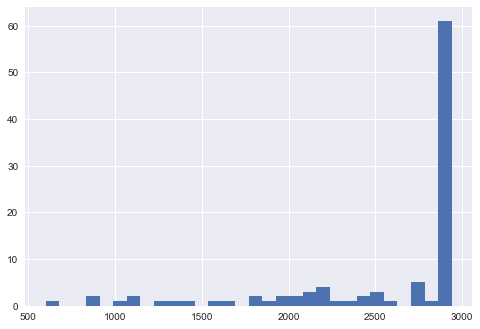

In [15]:
data_count.hist(bins=30)

In [16]:
df1 = df.dropna(axis=1, thresh=thresh)

<AxesSubplot:xlabel='Date', ylabel='Adj Close Price'>

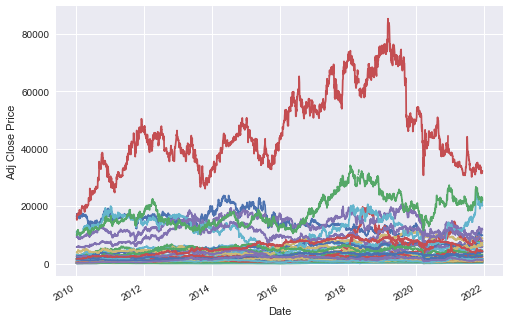

In [17]:
df1['Adj Close'].plot(legend=False, xlabel='Date', ylabel='Adj Close Price' )

In [18]:
adj_close = df1['Adj Close']

In [19]:
columns=df1.columns.get_level_values(0).unique()

In [20]:
df1.groupby(level=0, axis=1).mean().describe().round(2)

,Adj Close,Close,High,Low,Open,Volume
count,2945.00,2945.00,2945.00,2945.00,2945.00,2.945000e+03
mean,4051.23,4929.55,5001.18,4859.64,4932.98,3.067864e+07
std,759.20,685.55,687.48,682.76,685.68,1.565195e+07
min,1312.52,1335.00,1335.00,1335.00,1335.00,0.000000e+00
25%,3546.16,4500.06,4580.42,4431.99,4502.73,2.195886e+07
50%,4009.96,4977.58,5052.96,4913.75,4983.60,2.730578e+07
75%,4496.56,5359.39,5420.95,5282.19,5355.99,3.493761e+07
max,6117.38,6838.59,6838.59,6838.59,6838.59,1.878984e+08


In [21]:
df1.groupby(level=0, axis=1).mean().round(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,2219.25,3394.89,3427.35,3313.44,3359.85,17055766.65
2010-01-05,2248.67,3448.27,3473.45,3385.44,3446.54,29412161.88
2010-01-06,2245.34,3441.43,3507.69,3405.32,3438.84,31741730.48
2010-01-07,2248.64,3441.88,3499.48,3386.57,3439.67,33546109.37
2010-01-08,2284.49,3492.09,3518.48,3427.29,3492.33,23862044.17
...,...,...,...,...,...,...
2021-12-07,4366.52,4366.52,4410.96,4317.00,4360.44,29842071.15
2021-12-08,4325.35,4325.35,4408.77,4306.40,4374.88,29492005.77
2021-12-09,4340.31,4340.31,4386.10,4301.19,4339.77,24417751.92


In [22]:
adj_close

,AALI.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,ASII.JK,ASRI.JK,BBCA.JK,BBRI.JK,BBTN.JK,...,PTBA.JK,PWON.JK,RALS.JK,SMGR.JK,SMRA.JK,TINS.JK,TLKM.JK,UNTR.JK,UNVR.JK,WIKA.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16410.125000,270.381287,1063.347290,754.387878,1601.085449,2518.653564,96.725533,855.341125,588.306885,655.905151,...,1855.615967,116.141266,448.737213,5704.010254,259.101562,1120.500000,1403.605713,9867.144531,1649.384644,247.194794
2010-01-05,16650.947266,263.786591,1087.652222,742.020874,1601.085449,2532.923584,98.567917,863.809998,592.078125,655.905151,...,1855.615967,118.374763,482.732574,5779.062988,263.647217,1146.864624,1410.954590,10118.534180,1701.627808,247.194794
2010-01-06,16582.144531,267.083893,1093.728638,735.837280,1601.085449,2518.653564,98.567917,838.403809,584.535706,726.180725,...,1897.314941,111.674309,469.134491,5854.115723,268.192841,1160.047241,1396.257080,10087.111328,1686.700806,247.194794
2010-01-07,17235.794922,270.381287,1118.033569,723.470398,1635.891724,2440.168457,99.489105,842.638184,576.993347,726.180725,...,1902.527344,110.557556,455.536346,5779.062988,268.192841,1146.864624,1359.513550,9961.415039,1656.848022,247.194794
2010-01-08,17373.404297,273.678589,1190.949097,717.286987,1635.891724,2454.438232,102.252693,821.466431,580.764526,749.605896,...,1907.739746,111.674309,448.737213,5741.537109,268.192841,1146.864624,1374.210938,10307.079102,1664.311157,243.449371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-07,9925.000000,1090.000000,1905.000000,4260.000000,2340.000000,5925.000000,171.000000,7350.000000,4230.000000,1750.000000,...,2750.000000,486.000000,695.000000,8075.000000,880.000000,1550.000000,4150.000000,23000.000000,4270.000000,1215.000000
2021-12-08,9925.000000,1085.000000,1925.000000,4290.000000,2330.000000,5800.000000,171.000000,7425.000000,4210.000000,1750.000000,...,2720.000000,488.000000,695.000000,8025.000000,875.000000,1540.000000,4090.000000,22350.000000,4270.000000,1205.000000
2021-12-09,9950.000000,1075.000000,1935.000000,4330.000000,2330.000000,6000.000000,172.000000,7350.000000,4190.000000,1750.000000,...,2720.000000,480.000000,690.000000,8025.000000,880.000000,1565.000000,4150.000000,22325.000000,4370.000000,1190.000000


In [23]:
stocks_list = adj_close.columns

### **KOMPAS 100 Index Prices: 2010-2021**

In [24]:
# df2 = ipy.indices.get_index_historical_data(index='idx kompas 100', country='Indonesia', from_date='01/01/2010', to_date= today)
# df2.info()

In [25]:
# df2.to_pickle('market-data.pkl')

In [26]:
df2 = pd.read_pickle('market-data.pkl')
df2.describe().round(2)

,Open,High,Low,Close,Volume
count,2926.00,2926.00,2926.00,2926.00,2.926000e+03
mean,1052.30,1058.85,1044.65,1051.93,3.858968e+09
std,172.92,172.46,172.77,172.28,3.313029e+10
min,591.86,595.92,580.38,592.09,0.000000e+00
25%,922.67,929.16,914.17,923.21,2.256659e+09
50%,1069.06,1075.26,1061.62,1068.62,2.897808e+09
75%,1193.59,1200.60,1187.73,1193.44,3.788222e+09
max,1420.94,1421.95,1406.81,1421.50,1.793415e+12


In [27]:
df2.head(10)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,612.33,623.58,612.04,623.31,1528898048,IDR
2010-01-05,623.36,631.41,623.36,631.08,5152591360,IDR
2010-01-06,631.14,635.74,626.50,630.07,4109481984,IDR
2010-01-07,630.13,632.35,621.29,625.70,3900115968,IDR
2010-01-08,625.67,632.41,624.81,632.34,6547479040,IDR
2010-01-11,632.68,641.39,632.68,636.44,4524621824,IDR
2010-01-12,636.47,644.06,634.09,643.83,4894687744,IDR
2010-01-13,643.37,643.37,634.10,636.56,3641117440,IDR
2010-01-14,636.76,644.18,636.76,639.53,4644381184,IDR


<AxesSubplot:xlabel='Date'>

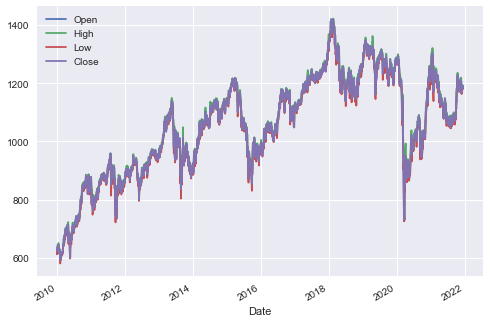

In [28]:
df2.iloc[:, :4].plot()

### **Indonesia Gov't Bond Yield 1 Year: 2010-2021**

Here, the bond yields of Indonesia's 1 Year Bond from 1 Jan 2010 to today are collected from Investing.com. 

In [29]:
# df5 = ipy.bonds.get_bond_historical_data(bond = 'INDONESIA 1Y', from_date='01/01/2010', to_date= today)
# bond_yield = df5[df5.index.isin(df2.index)].divide(100)

In [30]:
# bond_yield.to_pickle('bond-data.pkl')

<AxesSubplot:xlabel='Date', ylabel='Rate'>

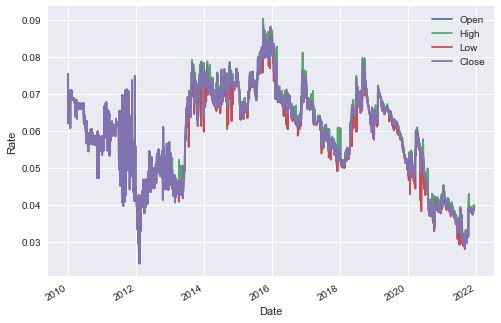

In [31]:
bond_yield = pd.read_pickle('bond-data.pkl').replace(0, method='ffill')
bond_yield.plot(ylabel='Rate')

In [32]:
bond_yield.describe().round(3)

,Open,High,Low,Close
count,2909.000,2909.000,2909.000,2909.000
mean,0.059,0.060,0.059,0.059
std,0.013,0.013,0.012,0.013
min,0.024,0.024,0.024,0.024
25%,0.050,0.051,0.050,0.050
50%,0.062,0.062,0.062,0.062
75%,0.068,0.069,0.068,0.068
max,0.090,0.090,0.089,0.089


### **Financial Summaries of KOMPAS100 Companies**

In [33]:
# info_summ = pd.DataFrame()
# fin_dict = {}

# for x in sym: 
#     info = ipy.stocks.get_stock_information(stock= x, country= 'Indonesia')
#     info_summ = info_summ.append(info)
    
#     try:
#         inc_sta = ipy.stocks.get_stock_financial_summary(stock= x, country= 'Indonesia', summary_type='income_statement')
#         fin_dict[x +'.JK']= inc_sta.sort_values(by='Date')
#     except:
#         pass

In [34]:
# fin_summ = pd.concat(fin_dict, axis=1)*1000000 #Values should be in millions IDR

# info_summ.reset_index(drop=True)
# info_summ.index = code_arr

In [35]:
# fin_summ.to_pickle('fin-summ.pkl')
# info_summ.to_pickle('info-summ.pkl')

In [36]:
info_summ = pd.read_pickle('info-summ.pkl').loc[stocks_list]
info_summ.sample(n=5)

,Stock Symbol,Prev. Close,Todays Range,Revenue,Open,52 wk Range,EPS,Volume,Market Cap,Dividend (Yield),Average Vol. (3m),P/E Ratio,Beta,1-Year Change,Shares Outstanding,Next Earnings Date
AKRA.JK,AKRA,3770.0,"3,730-3,770",1.648000e+13,3770.0,"2,450-3,960",264.42,1881200.0,1.476000e+13,135.00(3.58%),8070630.0,14.14,1.8,41.67%,3.947434e+09,01/11/2021
RALS.JK,RALS,650.0,635-655,2.770000e+12,640.0,500-980,-0.72,4990700.0,4.090000e+12,N/A(N/A),9654070.0,-,1.79,10.43%,6.441672e+09,29/10/2021
UNTR.JK,UNTR,21800.0,"21,150-21,700",6.447000e+13,21700.0,"18,525-28,475",1731.29,2663900.0,7.917000e+13,473.00(3.03%),3613248.0,12.26,0.72,-0.82%,3.730135e+09,01/11/2021
ICBP.JK,ICBP,8525.0,"8,450-8,525",5.179000e+13,8525.0,"7,625-10,625",551.38,1793900.0,9.913000e+13,215.00(2.52%),5294649.0,15.42,0.21,-14.79%,1.166191e+10,03/11/2021
CTRA.JK,CTRA,970.0,960-985,9.290000e+12,975.0,"620-1,350",88.19,11726500.0,1.807000e+13,8.50(0.88%),28795081.0,11.06,2.09,46.62%,1.853570e+10,03/11/2021


In [37]:
fin_summ = pd.read_pickle('fin-summ.pkl').loc[:,stocks_list]
fin_test=fin_summ[:training_year]

In [38]:
fin_test

AALI.JK                                               \
           Total Revenue  Gross Profit Operating Income    Net Income   
Date                                                                    
2017-12-31  1.730569e+13  4.145250e+12     2.992440e+12  1.968027e+12   
2018-12-31  1.908439e+13  3.539506e+12     2.180324e+12  1.438511e+12   

                 ADHI.JK                                               \
           Total Revenue  Gross Profit Operating Income    Net Income   
Date                                                                    
2017-12-31  1.515618e+13  2.057806e+12     1.707672e+12  5.154153e+11   
2018-12-31  1.565550e+13  2.506603e+12     1.798931e+12  6.441589e+11   

                 ADRO.JK                ...          UNTR.JK                \
           Total Revenue  Gross Profit  ... Operating Income    Net Income   
Date                                    ...                                  
2017-12-31  3.258330e+09  1.141500e+09  ...     1.057159e+13  7.402966e+12   
2018-12-31  3.619750e+09  1.210210e+09  ...     1.658316e+13  1.112563e+13   

                 UNVR.JK                                               \
           Total Revenue  Gross Profit Operating Income    Net Income   
Date                                                                    
2017-12-31  4.120451e+13  2.123528e+13     9.495764e+12  7.004562e+12   
2018-12-31  4.180207e+13  2.116389e+13     1.232421e+13  9.081187e+12   

                 WIKA.JK                                               
           Total Revenue  Gross Profit Operating Income    Net Income  
Date                                                                   
2017-12-31  2.617640e+13  2.876234e+12     2.804569e+12  1.202069e+12  
2018-12-31  3.115819e+13  3.604727e+12     4.367729e+12  1.730256e+12  

[2 rows x 195 columns]

In [39]:
avg_growth = fin_test.pct_change().dropna().mean().rename(index={'Total Revenue': 'Mean Revenue Growth', 'Gross Profit':'Mean Gross Profit Growth',
                                                                'Net Income': 'Mean Net Income Growth', 'Operating Income': 'Mean Operating Income Growth'})

growth_dict={'Mean Rev. Growth': avg_growth[:,'Mean Revenue Growth'],
             'Mean Net Inc. Growth': avg_growth[:,'Mean Net Income Growth']}

In [40]:
growth_data = pd.concat(growth_dict, axis=1)
growth_data[(growth_data.isnull()).any(axis=1)]

,Mean Rev. Growth,Mean Net Inc. Growth


In [41]:
index_=adj_close.columns
eps = info_summ['EPS'][index_]
per = pd.to_numeric(info_summ['P/E Ratio'], errors='coerce').fillna(0)[index_]
mcap = pd.to_numeric(info_summ['Market Cap'], errors='coerce')[index_]
beta_real = pd.to_numeric(info_summ['Beta'], errors='coerce')[index_]

## **Daily Returns of Stocks**

In [42]:
close_price_all = adj_close.interpolate(method='time', axis=0)#.dropna(axis=0, how='all').round(2)
close_price_all[(close_price_all==0).any(axis=1)]

,AALI.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,ASII.JK,ASRI.JK,BBCA.JK,BBRI.JK,BBTN.JK,...,PTBA.JK,PWON.JK,RALS.JK,SMGR.JK,SMRA.JK,TINS.JK,TLKM.JK,UNTR.JK,UNVR.JK,WIKA.JK
Date,,,,,,,,,,,,,,,,,,,,,


In [43]:
close_price = close_price_all[:training_year]

In [44]:
ret_all = log_rate(close_price)#close_price.apply(lambda x: np.log(1+x)).pct_change().dropna(how='all')

In [45]:
ret_all

,AALI.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,ASII.JK,ASRI.JK,BBCA.JK,BBRI.JK,BBTN.JK,...,PTBA.JK,PWON.JK,RALS.JK,SMGR.JK,SMRA.JK,TINS.JK,TLKM.JK,UNTR.JK,UNVR.JK,WIKA.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.014569,-0.024693,0.022600,-0.016529,0.000000,0.005650,0.018868,0.009852,0.006390,0.000000,...,0.000000,0.019048,0.073025,0.013072,0.017392,0.023257,0.005222,0.025158,0.031183,0.000000
2010-01-06,-0.004141,0.012422,0.005571,-0.008368,0.000000,-0.005650,0.000000,-0.029853,-0.012821,0.101783,...,0.022223,-0.058269,-0.028573,0.012903,0.017094,0.011429,-0.010471,-0.003110,-0.008811,0.000000
2010-01-07,0.038662,0.012270,0.021979,-0.016949,0.021506,-0.031657,0.009302,0.005038,-0.012987,0.000000,...,0.002743,-0.010050,-0.029414,-0.012903,0.000000,-0.011429,-0.026668,-0.012539,-0.017857,0.000000
2010-01-08,0.007952,0.012121,0.063179,-0.008584,0.000000,0.005831,0.027399,-0.025447,0.006515,0.031749,...,0.002736,0.010050,-0.015038,-0.006515,0.000000,0.000000,0.010753,0.034112,0.004494,-0.015268
2010-01-11,-0.011952,-0.012121,0.010152,0.017094,-0.010695,0.015862,0.052644,0.010256,0.000000,-0.021054,...,-0.010989,0.000000,-0.030772,0.012987,0.000000,0.011429,0.010638,0.050531,0.008929,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007576,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-26,-0.053401,-0.028348,-0.024293,-0.011615,0.000000,-0.036258,-0.005083,0.010582,-0.005540,-0.015625,...,0.014085,-0.016807,0.000000,0.004338,-0.062914,-0.027029,-0.008011,-0.029040,-0.023339,-0.017596
2018-12-27,-0.010605,0.003190,0.016260,0.016223,0.000000,0.012233,-0.006390,-0.005758,0.016529,0.011742,...,0.000000,0.025106,-0.014085,0.010764,0.025642,0.020340,0.005348,0.016439,0.023339,-0.011905


### **Daily Average Rate of Return**

<AxesSubplot:xlabel='Date', ylabel='Daily Returns'>

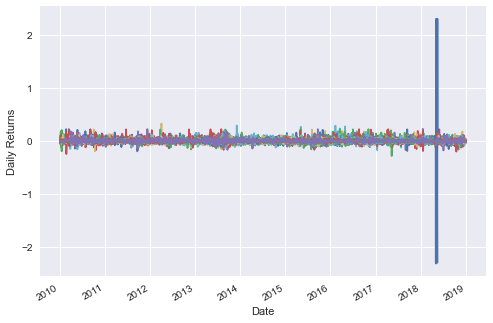

In [46]:
ret_all.plot(legend=False, ylabel='Daily Returns')

In [47]:
# ret_all.info()

### **Daily Price Movements**

In [48]:
open_price = df1['Open'][:training_year].dropna(how='all')
close_price = df1['Close'][:training_year].dropna(how='all')

In [49]:
daily_movt = log_rate(close_price/open_price).fillna(0)

In [50]:
daily_movt_corr=daily_movt.ewm(span=300).mean().corr()

In [51]:
daily_movt_dist=np.sqrt((1-daily_movt_corr)*2.0)

## **Volume**

In [52]:
stocks_volume = df1['Volume'][:training_year].dropna(how='all', axis=1)
stocks_volume_d_avg=stocks_volume.mean()
stocks_volume_total = stocks_volume.sum()

<AxesSubplot:xlabel='Date'>

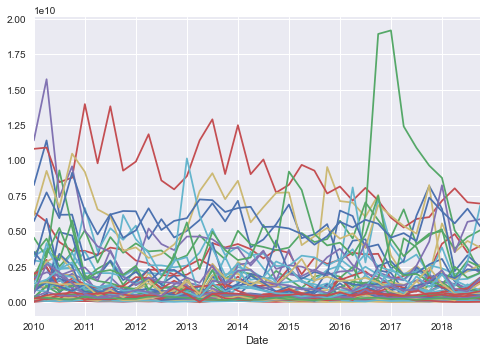

In [53]:
stocks_volume.resample('BQ').sum().plot(legend=False)

In [54]:
market_volume =  df2['Volume'][:training_year]
market_volume_d_avg=market_volume.mean()
market_volume_total = market_volume.sum()

In [55]:
avg_daily_volume_ratio = stocks_volume_d_avg / market_volume_d_avg
avg_daily_volume_ratio.sort_values()

GGRM.JK    0.000270
AALI.JK    0.000372
ISAT.JK    0.000391
ITMG.JK    0.000402
INTP.JK    0.000708
             ...   
BBCA.JK    0.018132
ASRI.JK    0.019156
LPKR.JK    0.024067
TLKM.JK    0.024621
BBRI.JK    0.037936
Length: 52, dtype: float64

In [56]:
total_volume_ratio = stocks_volume_total / market_volume_total
total_volume_ratio.sort_values()

GGRM.JK    0.000271
AALI.JK    0.000373
ISAT.JK    0.000392
ITMG.JK    0.000403
INTP.JK    0.000708
             ...   
BBCA.JK    0.018165
ASRI.JK    0.019130
LPKR.JK    0.024067
TLKM.JK    0.024632
BBRI.JK    0.037970
Length: 52, dtype: float64

In [57]:
volume_data = pd.DataFrame({'Total Vol. Ratio':total_volume_ratio, 
                            'Avg. Trading Vol. Ratio (Daily)':avg_daily_volume_ratio})
volume_data.sort_values(by='Total Vol. Ratio')

,Total Vol. Ratio,Avg. Trading Vol. Ratio (Daily)
GGRM.JK,0.000271,0.000270
AALI.JK,0.000373,0.000372
ISAT.JK,0.000392,0.000391
ITMG.JK,0.000403,0.000402
INTP.JK,0.000708,0.000708
...,...,...
BBCA.JK,0.018165,0.018132
ASRI.JK,0.019130,0.019156
LPKR.JK,0.024067,0.024067
TLKM.JK,0.024632,0.024621


In [58]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), fontweight='semibold', alpha=0.7)

# data_plot=volume_data

# fig, ax = plt.subplots(figsize = [10,8])
# ax = sns.scatterplot(x='Total Vol. Ratio', y='Avg. Trading Vol. Ratio (Daily)', 
#                 data=data_plot, s=100)
# ax.set_title('Trade Volume of Stocks vs Market Volume', fontsize=20)
# label_point(data_plot['Total Vol. Ratio'], data_plot['Avg. Trading Vol. Ratio (Daily)'],
#             data_plot.index.to_series(), ax)

### **Data Clean Up**

Here we can see that there are definite outliers in the data. To clean up the data, we caculate the _Z-score_ of each stock (column) and remove any value that has a _Z-score_ of above $\pm 3\sigma$.

In [59]:
from scipy import stats

In [60]:
ret = ret_all.apply(lambda col: col[np.abs(stats.zscore(col, nan_policy='omit')) < 3])
ret = ret.interpolate(method='time')

In [61]:
ret_ann = ret.resample('Y').sum()
ret_ann.index = ret_ann.index.strftime('%Y')

In [62]:
ret_mon = ret.resample('BM').sum()

In [63]:
sample=ret.sample(n=5, axis=1).columns

<AxesSubplot:xlabel='Date', ylabel='Daily Return Rate'>

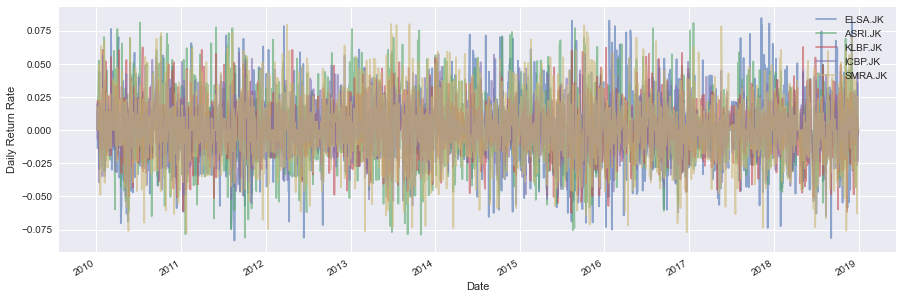

In [64]:
ret[sample].plot(ylabel='Daily Return Rate', alpha=0.6, figsize=(15,5))

In [65]:
ret[sample]

,ELSA.JK,ASRI.JK,KLBF.JK,ICBP.JK,SMRA.JK
Date,,,,,
2010-01-05,0.013793,0.018868,0.000000,0.020203,0.017392
2010-01-06,-0.013793,0.000000,0.022473,-0.006689,0.017094
2010-01-07,0.013793,0.009302,0.000000,0.006689,0.000000
2010-01-08,0.000000,0.027399,0.007380,0.006644,0.000000
2010-01-11,-0.014599,0.052644,-0.007380,0.006601,0.000000
...,...,...,...,...,...
2018-12-24,-0.021404,-0.007576,0.000000,0.000000,0.000000
2018-12-26,-0.014528,-0.005083,-0.022914,-0.026476,-0.062914
2018-12-27,0.035932,-0.006390,0.009885,0.042966,0.025642


<AxesSubplot:xlabel='Date', ylabel='Monthly Return Rate'>

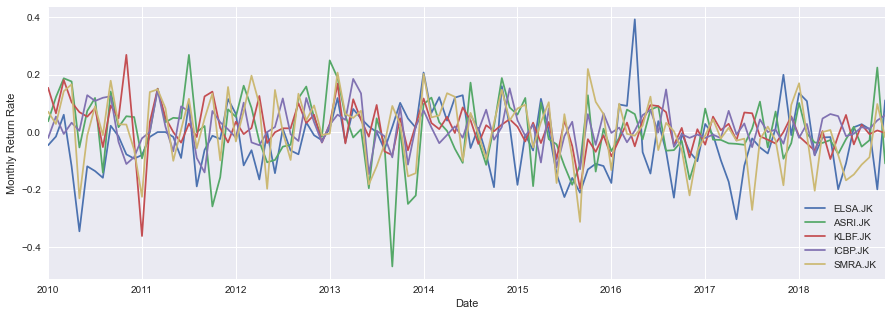

In [66]:
ret_mon[sample].plot(ylabel='Monthly Return Rate', figsize=(15,5))

<AxesSubplot:xlabel='Date', ylabel='Annual Return Rate'>

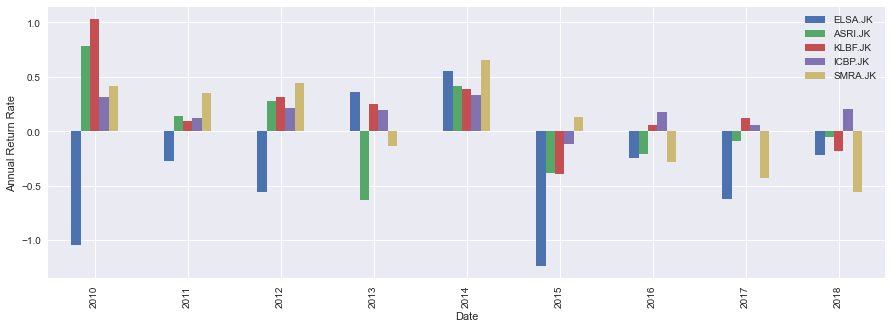

In [67]:
ret_ann[sample].plot(kind='bar', ylabel='Annual Return Rate',figsize=(15,5))

In [68]:
freq = ret.apply(lambda col: col.value_counts())

### **Distributions of Rate of Return**

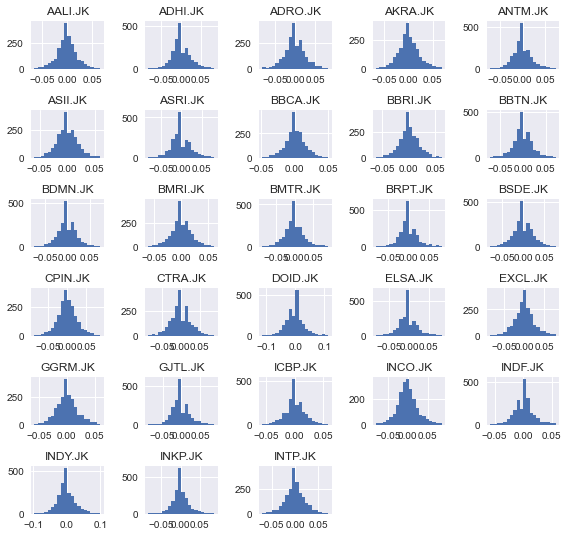

In [69]:
ret.iloc[:,:28].hist(bins=20,figsize=(8,16), layout=(13,5))
plt.tight_layout()

In [70]:
# ret.iloc[:,29:].hist(bins=20,figsize=(8,16), layout=(13,5))
# plt.tight_layout()

# **Correlation Matrix of Stocks**

In [71]:
corr_matrix = ret.corr()#.ewm(span=300).corr()
#corr_matrix = corr_matrix.loc[corr_matrix.index.levels[0][-1]]

In [72]:
# corr_matrix.info()

<AxesSubplot:>

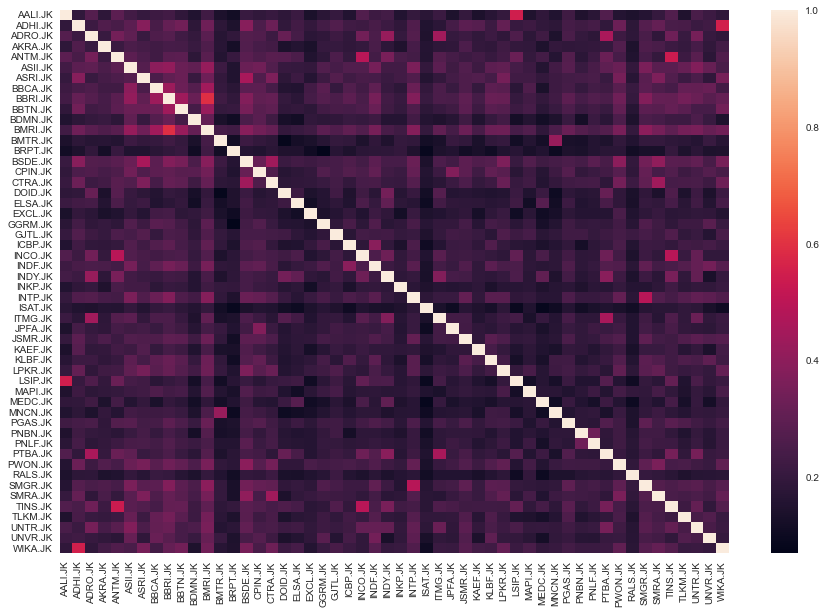

In [73]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix)

## **Correlation Score**

This is an _experimental_ variable where each stock is assigned a _score_ based on its average correlation value to other stocks in KOMPAS100. A low score may suggests that the stock is highly uncorrelated to other stocks and may help in building a highly diversified portfolio.

In [74]:
corr_score = corr_matrix.apply(lambda col: (col.sum() - 1 )/ (len(col)-1))
corr_score.sort_values().head(20)

ISAT.JK    0.146600
BRPT.JK    0.150126
RALS.JK    0.163267
MEDC.JK    0.170151
EXCL.JK    0.171054
BMTR.JK    0.173394
MNCN.JK    0.179159
INKP.JK    0.182211
DOID.JK    0.185423
PNBN.JK    0.188410
ELSA.JK    0.188608
KAEF.JK    0.190100
MAPI.JK    0.190933
BDMN.JK    0.196063
AALI.JK    0.199165
LSIP.JK    0.200058
PNLF.JK    0.201011
JPFA.JK    0.202898
ICBP.JK    0.205594
AKRA.JK    0.205692
dtype: float64

In [75]:
dist_matrix = np.sqrt((1-corr_matrix)*2)

<AxesSubplot:>

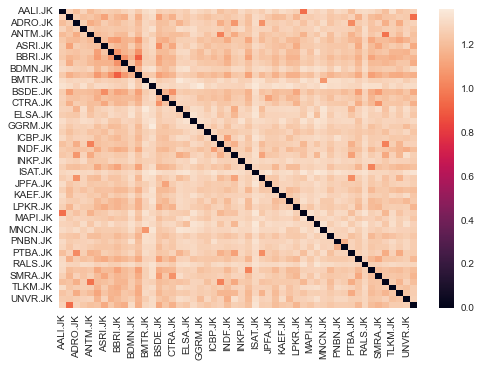

In [76]:
sns.heatmap(dist_matrix)

In [77]:
from scipy.spatial.distance import pdist
cond_dist_matrix = pdist(ret)

In [78]:
cond_dist_matrix

array([0.2407549 , 0.22807455, 0.17914825, ..., 0.18143608, 0.14345356,
       0.12212567])

## **Market (KOMPAS100 Index) Rate of Return**

In [79]:
market_price = df2[:training_year]['Close']
rate_market = log_rate(market_price).interpolate(method='time')
rate_market

Date
2010-01-05    0.012389
2010-01-06   -0.001602
2010-01-07   -0.006960
2010-01-08    0.010556
2010-01-11    0.006463
                ...   
2018-12-20   -0.005739
2018-12-21    0.001597
2018-12-26   -0.008225
2018-12-27    0.010112
2018-12-28   -0.003301
Name: Close, Length: 2205, dtype: float64

In [80]:
rate_market_ann=market_price.resample('Y').ffill().pct_change().dropna()

In [81]:
rate_market_annual = rate_market_ann.mean()

In [82]:
rate_market_annual

0.05646852263819893

<AxesSubplot:xlabel='Date', ylabel='Daily Return Rate'>

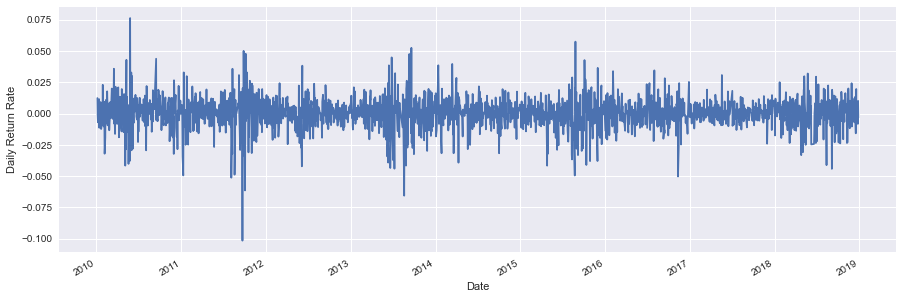

In [83]:
rate_market.plot(legend=False, ylabel='Daily Return Rate', figsize=(15,5))

## **Daily Bond Yield**

In [84]:
rate_bond = bond_yield['Close'][:training_year]
rate_bond.mean()

0.06263448149840099

In [85]:
daily_rf = (rate_bond)*(1/(365))
daily_rf

Date
2010-01-04    0.000207
2010-01-05    0.000174
2010-01-06    0.000185
2010-01-07    0.000170
2010-01-08    0.000181
                ...   
2018-12-20    0.000178
2018-12-21    0.000178
2018-12-26    0.000177
2018-12-27    0.000175
2018-12-28    0.000173
Name: Close, Length: 2189, dtype: float64

## **Excess Market Returns**

In [86]:
excess_ret_mar = ret.apply(lambda column: column-rate_market[rate_market.index.isin(column.index)]).dropna()

<AxesSubplot:xlabel='Date'>

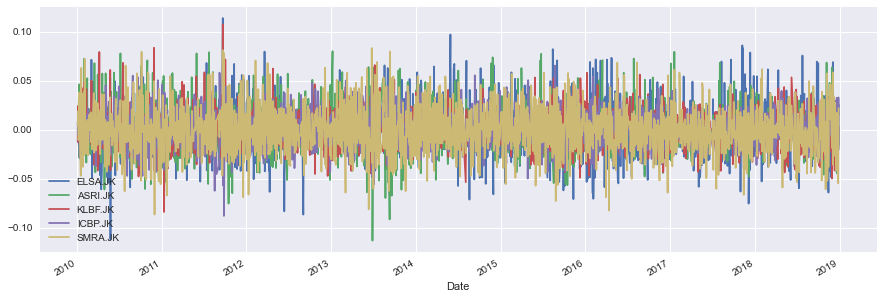

In [87]:
excess_ret_mar[sample].plot(figsize=(15,5))

In [88]:
excess_ret_mar

,AALI.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,ASII.JK,ASRI.JK,BBCA.JK,BBRI.JK,BBTN.JK,...,PTBA.JK,PWON.JK,RALS.JK,SMGR.JK,SMRA.JK,TINS.JK,TLKM.JK,UNTR.JK,UNVR.JK,WIKA.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.002180,-0.037081,0.010211,-0.028918,-0.012389,-0.006739,0.006480,-0.002536,-0.005999,-0.012389,...,-0.012389,0.006660,0.060637,0.000683,0.005003,0.010868,-0.007167,0.012770,0.018794,-0.012389
2010-01-06,-0.002539,0.014024,0.007173,-0.006767,0.001602,-0.004048,0.001602,-0.028251,-0.011219,0.001602,...,0.023825,-0.056667,-0.026972,0.014505,0.018696,0.013031,-0.008870,-0.001509,-0.007209,0.001602
2010-01-07,0.045622,0.019230,0.028939,-0.009989,0.028466,-0.024697,0.016262,0.011998,-0.006027,0.006960,...,0.009703,-0.003091,-0.022454,-0.005943,0.006960,-0.004469,-0.019708,-0.005579,-0.010898,0.006960
2010-01-08,-0.002604,0.001565,0.052623,-0.019140,-0.010556,-0.004725,0.016843,-0.036003,-0.004042,0.021192,...,-0.007820,-0.000506,-0.025594,-0.017071,-0.010556,-0.010556,0.000197,0.023556,-0.006062,-0.025824
2010-01-11,-0.018415,-0.018584,0.003689,0.010631,-0.017158,0.009399,0.046181,0.003794,-0.006463,-0.027516,...,-0.017452,-0.006463,-0.037235,0.006524,-0.006463,0.004966,0.004176,0.044068,0.002466,-0.006463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.033797,-0.003421,0.013739,-0.003414,0.012296,0.011656,-0.012172,-0.016495,0.000274,-0.017076,...,0.017518,-0.002492,0.005739,0.003563,-0.018652,-0.007506,-0.012805,0.011829,0.011279,-0.005957
2018-12-21,-0.013525,-0.013942,-0.005589,-0.006205,0.004918,-0.007514,-0.044680,0.009099,-0.009850,-0.009319,...,-0.011008,-0.009895,-0.005087,0.000580,0.010673,-0.001597,0.003737,-0.032422,0.027801,0.010099
2018-12-26,-0.045176,-0.020124,-0.016068,-0.003390,0.008225,-0.028033,0.003142,0.018807,0.002684,-0.007401,...,0.022309,-0.008583,0.008225,0.012563,-0.054689,-0.018804,0.000214,-0.020816,-0.015115,-0.009371


## **Market Premium**

In [89]:
market_premium = (rate_market[rate_market.index.isin(daily_rf.index)] - daily_rf).dropna()
market_premium.mean()

0.00013656166606135662

<AxesSubplot:xlabel='Date'>

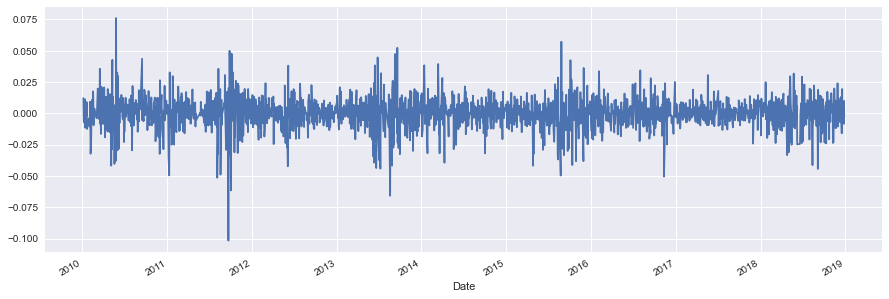

In [90]:
market_premium.plot(figsize=(15,5))

In [91]:
market_premium.sort_values()

Date
2011-09-22   -0.101680
2013-08-19   -0.065799
2011-10-03   -0.061567
2011-08-05   -0.051411
2016-11-11   -0.050456
                ...   
2011-10-06    0.047585
2011-09-27    0.049916
2013-09-19    0.052321
2015-08-27    0.057259
2010-05-26    0.076126
Name: Close, Length: 2188, dtype: float64

## **Risk Premium**

In [92]:
risk_premium = ret.apply(lambda column: column-daily_rf[daily_rf.index.isin(column.index)]).dropna()

<AxesSubplot:xlabel='Date'>

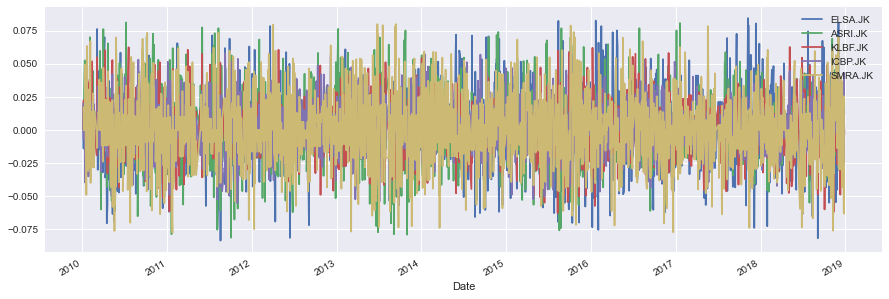

In [93]:
risk_premium[sample].plot(figsize=(15,5))

In [94]:
risk_premium

,AALI.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,ASII.JK,ASRI.JK,BBCA.JK,BBRI.JK,BBTN.JK,...,PTBA.JK,PWON.JK,RALS.JK,SMGR.JK,SMRA.JK,TINS.JK,TLKM.JK,UNTR.JK,UNVR.JK,WIKA.JK
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.014395,-0.024867,0.022426,-0.016703,-0.000174,0.005476,0.018695,0.009679,0.006216,-0.000174,...,-0.000174,0.018874,0.072852,0.012898,0.017218,0.023083,0.005048,0.024984,0.031009,-0.000174
2010-01-06,-0.004325,0.012238,0.005387,-0.008553,-0.000185,-0.005834,-0.000185,-0.030038,-0.013005,-0.000185,...,0.022038,-0.058454,-0.028758,0.012719,0.016910,0.011244,-0.010656,-0.003295,-0.008996,-0.000185
2010-01-07,0.038492,0.012100,0.021809,-0.017119,0.021336,-0.031827,0.009132,0.004868,-0.013157,-0.000170,...,0.002573,-0.010220,-0.029584,-0.013073,-0.000170,-0.011599,-0.026838,-0.012709,-0.018027,-0.000170
2010-01-08,0.007771,0.011940,0.062998,-0.008765,-0.000181,0.005650,0.027218,-0.025628,0.006334,0.031568,...,0.002555,0.009869,-0.015219,-0.006696,-0.000181,-0.000181,0.010572,0.033931,0.004313,-0.015449
2010-01-11,-0.012133,-0.012301,0.009972,0.016914,-0.010875,0.015682,0.052464,0.010076,-0.000180,-0.021234,...,-0.011169,-0.000180,-0.030952,0.012807,-0.000180,0.011249,0.010458,0.050351,0.008748,-0.000180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.027880,-0.009338,0.007822,-0.009331,0.006379,0.005739,-0.018089,-0.022412,-0.005642,-0.022993,...,0.011601,-0.008409,-0.000178,-0.002354,-0.024569,-0.013423,-0.018722,0.005912,0.005362,-0.011874
2018-12-21,-0.012106,-0.012524,-0.004170,-0.004786,0.006337,-0.006095,-0.043261,0.010518,-0.008431,-0.007900,...,-0.009589,-0.008476,-0.003668,0.001999,0.012092,-0.000178,0.005156,-0.031003,0.029220,0.011518
2018-12-26,-0.053578,-0.028525,-0.024470,-0.011792,-0.000177,-0.036435,-0.005260,0.010405,-0.005717,-0.015802,...,0.013908,-0.016984,-0.000177,0.004161,-0.063091,-0.027206,-0.008188,-0.029217,-0.023516,-0.017773


In [95]:
def reg_plot(x,y):
    exog = x[x.index.isin(y.index)]
    endog = y[y.index.isin(x.index)]
    reg_analysis=pd.DataFrame({'Risk Premium': endog, 'Market Premium':exog})
    fig, ax = plt.subplots()
    sns.regplot(x='Market Premium', y= 'Risk Premium', data= reg_analysis, ci=None,\
            line_kws={'color':'r'},scatter_kws={"s": 20}, ax=ax)
    ax.axhline(y=0, color='k', linewidth=1)  
    ax.axvline(x=0, color='k', linewidth=1)

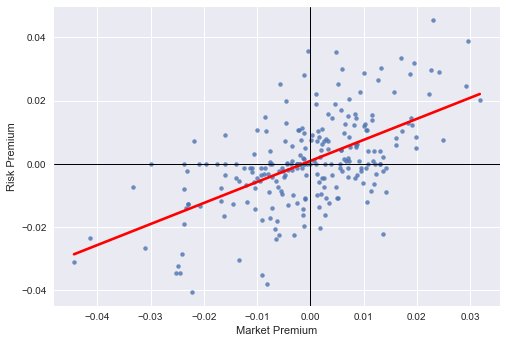

In [96]:
y = risk_premium['BBCA.JK'].loc['2018']
x = market_premium.loc['2018']
reg_plot(x,y)

## **Instruments Analysis**

In [97]:
def lin_regression(asset_ret, market_ret):
    stock = asset_ret[asset_ret.index.isin(market_ret.index)] 
    market = market_ret[market_ret.index.isin(stock.index)] 
    reg = stock.apply(lambda col: stats.linregress(col.dropna(), market[market.index.isin(col.dropna().index)]))
    return reg

In [98]:
#Training Data
train_ret = ret[:training_year]
res= pd.DataFrame()
metrics =pd.DataFrame()
sharpe =pd.DataFrame()

for year in range(2010, int(training_year)):
    
    yr = f'{year}'

    #Covariances
    tr_cov = train_ret[:yr].cov()
    tr_std = train_ret[:yr].std()
    tr_semicov = train_ret[:yr][train_ret[:yr] < 0].cov()
    tr_mar_cov = train_ret[:yr].apply(lambda col: col.cov(rate_market[:yr]))
    tr_mar_var = rate_market[:yr].var()

    #Regression
    tr_y = risk_premium.loc[:yr]
    tr_x = market_premium.loc[:yr]
    reg = lin_regression(tr_y,tr_x)
    tr_alpha = reg.iloc[1]
    tr_beta = reg.iloc[0]
    tr_rsq = reg.iloc[2]
    tr_sse = reg.iloc[4]


    #Expected Returns Market
    tr_market_er = rate_market[:yr].mean()*252
    tr_risk_free = daily_rf[:yr].mean()*365
    tr_er_marketprem = (tr_market_er - tr_risk_free)

    #CAPM Beta 
    tr_beta_stat = tr_mar_cov.divide(tr_mar_var)

    #LReg Expected Return
    tr_beta_prem = tr_beta.apply(lambda x: x*(market_premium.loc[yr])).T
    tr_lreg_ret = tr_alpha + tr_beta_prem.sum() + tr_risk_free
    tr_exp_ret = tr_lreg_ret

    #CAPM Expected Return
    tr_beta_prem_stat = tr_beta_stat*tr_er_marketprem
    tr_ols = (tr_beta_prem_stat + tr_risk_free)
    tr_exp_ret_stat = tr_ols

    #Annualised Return
    tr_mean_ret = train_ret[:yr].mean()
    tr_ind_er = tr_mean_ret*(252)
    
    #Exponentially Weighted Return
    tr_300ewm_ret = train_ret[:yr].ewm(span=300).mean().iloc[-1]
    tr_300ewm_er = tr_300ewm_ret*252
    tr_500ewm_ret = train_ret[:yr].ewm(span=500).mean().iloc[-1]
    tr_500ewm_er = tr_500ewm_ret*252
    
    #Ex-ante Sharpe
    tr_sharpe_ante = (tr_exp_ret - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_capm = (tr_exp_ret_stat - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_ann = (tr_ind_er - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_300ewm = (tr_300ewm_er - tr_risk_free)/(tr_std*np.sqrt(252))
    tr_sharpe_ante_500ewm = (tr_500ewm_er - tr_risk_free)/(tr_std*np.sqrt(252))
    
    #Real Return 2019
    tr_ret = ret_ann.loc[f'{year+1}']
    tr_real_std = ret.loc[f'{year+1}'].std()
    
    #Ex-post Sharpe
    tr_sharpe_post = (tr_ret - tr_risk_free)/(tr_real_std*np.sqrt(252))    
    
    rets_data = pd.DataFrame({'Exp. Ret. (LinReg)': tr_exp_ret, 'Exp. Ret. (OLS)': tr_exp_ret_stat, 'Exp. Annualised Return': tr_ind_er, 'Exp. 300 EMA Return':tr_300ewm_er,'Exp. 500 EMA Return':tr_500ewm_er,
                              'Realised Return': tr_ret}).T.stack()
    metrics_data = pd.DataFrame({'Beta(CAPM)':tr_beta_stat, 'Beta (LinReg)': tr_beta, 'Alpha (LinReg)':tr_alpha}).T.stack()
    sharpe_data = pd.DataFrame({'Ex-Ante Sharpe LinReg':tr_sharpe_ante, 'Ex-Ante Sharpe CAPM':tr_sharpe_ante_capm, 'Ex-Ante Sharpe AnnRet':tr_sharpe_ante_ann, 
                                'Ex-Ante Sharpe 300 EMA':tr_sharpe_ante_300ewm, 'Ex-Ante Sharpe 500 EMA':tr_sharpe_ante_500ewm,'Ex-Post Sharpe':tr_sharpe_post}).T.stack()
    
    res[f'{year+1}'] = rets_data
    metrics[f'{year+1}'] = metrics_data
    sharpe[f'{year+1}'] = sharpe_data


In [99]:
res_mean_ann=res.groupby(axis=0, level=0).mean().T

<AxesSubplot:>

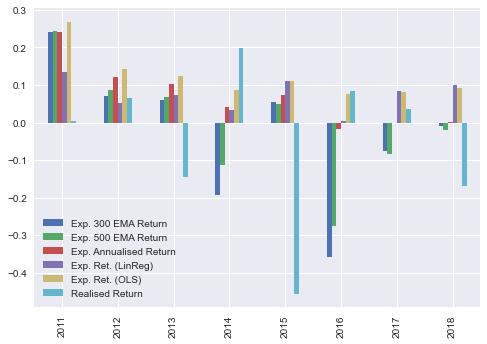

In [100]:
res_mean_ann.plot(kind='bar')

In [101]:
ttest_rets = res_mean_ann.apply(lambda col: stats.ttest_ind(col, res_mean_ann['Realised Return']))
ttest_rets.rename(index={0:'t-statistics', 1:'p-value'},inplace=True)

In [102]:
ttest_rets

,Exp. 300 EMA Return,Exp. 500 EMA Return,Exp. Annualised Return,Exp. Ret. (LinReg),Exp. Ret. (OLS),Realised Return
t-statistics,0.222791,0.459279,1.510591,1.652822,2.248858,0.0
p-value,0.826916,0.653084,0.153131,0.120608,0.041142,1.0


In [103]:
res_mean_ann.corr()

,Exp. 300 EMA Return,Exp. 500 EMA Return,Exp. Annualised Return,Exp. Ret. (LinReg),Exp. Ret. (OLS),Realised Return
Exp. 300 EMA Return,1.000000,0.987972,0.819569,0.847916,0.776617,-0.408217
Exp. 500 EMA Return,0.987972,1.000000,0.891564,0.789732,0.837366,-0.329122
Exp. Annualised Return,0.819569,0.891564,1.000000,0.539578,0.955982,-0.051521
Exp. Ret. (LinReg),0.847916,0.789732,0.539578,1.000000,0.593700,-0.596183
Exp. Ret. (OLS),0.776617,0.837366,0.955982,0.593700,1.000000,0.004750
Realised Return,-0.408217,-0.329122,-0.051521,-0.596183,0.004750,1.000000


In [104]:
res_mean_ann.apply(lambda col: (np.square(res_mean_ann['Realised Return']-col)).mean())

Exp. 300 EMA Return       0.093239
Exp. 500 EMA Return       0.077716
Exp. Annualised Return    0.058297
Exp. Ret. (LinReg)        0.061924
Exp. Ret. (OLS)           0.068646
Realised Return           0.000000
dtype: float64

In [105]:
metrics

2011      2012      2013      2014      2015  \
Beta(CAPM)     AALI.JK  0.762264  0.669005  0.713368  0.629167  0.632838   
               ADHI.JK  0.850061  0.797992  0.840150  0.862796  0.934687   
               ADRO.JK  0.862727  0.920712  0.987688  0.920379  0.932140   
               AKRA.JK  0.854440  0.782662  0.848484  0.789700  0.778682   
               ANTM.JK  1.004409  0.867832  0.881997  0.816823  0.786820   
...                          ...       ...       ...       ...       ...   
Alpha (LinReg) TINS.JK  0.001069  0.000559  0.000426  0.000277  0.000359   
               TLKM.JK  0.001423  0.000709  0.000455  0.000256  0.000251   
               UNTR.JK  0.000718  0.000105  0.000380  0.000090  0.000261   
               UNVR.JK  0.000755  0.000085  0.000071 -0.000012  0.000076   
               WIKA.JK  0.000387  0.000161 -0.000028 -0.000104 -0.000109   

                            2016      2017      2018  
Beta(CAPM)     AALI.JK  0.655392  0.631634  0.624904  
               ADHI.JK  0.930478  0.913182  0.907482  
               ADRO.JK  0.914817  0.908588  0.919928  
               AKRA.JK  0.701199  0.701182  0.707693  
               ANTM.JK  0.768136  0.754818  0.744872  
...                          ...       ...       ...  
Alpha (LinReg) TINS.JK  0.000345  0.000285  0.000389  
               TLKM.JK  0.000077  0.000065  0.000146  
               UNTR.JK  0.000092  0.000120  0.000123  
               UNVR.JK -0.000046 -0.000037 -0.000021  
               WIKA.JK -0.000126 -0.000032  0.000113  

[156 rows x 8 columns]

<AxesSubplot:>

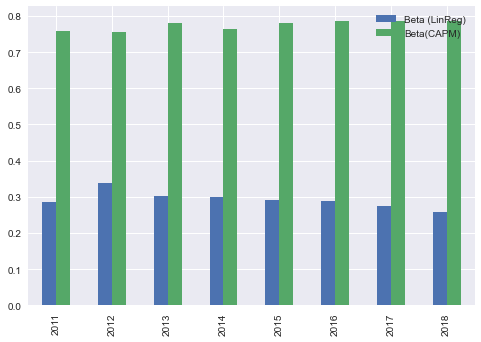

In [106]:
annual_betas = metrics.groupby(level=0).mean().drop('Alpha (LinReg)')
annual_betas.T.plot(kind='bar')

In [107]:
sharpe

2011      2012      2013      2014  \
Ex-Ante Sharpe LinReg AALI.JK  0.266629 -0.032314  0.063055 -0.076436   
                      ADHI.JK  0.138250 -0.018482  0.036353 -0.045839   
                      ADRO.JK  0.226310 -0.023612  0.054497 -0.064749   
                      AKRA.JK  0.193858 -0.026635  0.052734 -0.069476   
                      ANTM.JK  0.271133 -0.036430  0.080957 -0.087853   
...                                 ...       ...       ...       ...   
Ex-Post Sharpe        TINS.JK -0.476029  0.013805 -0.361388  0.048148   
                      TLKM.JK -0.496375  0.472110  0.007225  1.397363   
                      UNTR.JK  0.329041 -1.038409  0.756506 -0.388564   
                      UNVR.JK  0.829238  0.671042 -0.502581  0.817672   
                      WIKA.JK -0.693263  1.842115 -0.001401  2.520315   

                                   2015      2016      2017      2018  
Ex-Ante Sharpe LinReg AALI.JK  0.162665 -0.161767  0.058708  0.112161  
                      ADHI.JK  0.107701 -0.119722  0.047975  0.087415  
                      ADRO.JK  0.131957 -0.134170  0.045588  0.083367  
                      AKRA.JK  0.153563 -0.155482  0.055459  0.099962  
                      ANTM.JK  0.191109 -0.190948  0.069803  0.120865  
...                                 ...       ...       ...       ...  
Ex-Post Sharpe        TINS.JK -2.378450  0.475176 -1.915709 -0.658382  
                      TLKM.JK -0.179853  0.554668 -0.491843 -0.461387  
                      UNTR.JK -0.122402 -0.083338  1.043249 -0.649229  
                      UNVR.JK -0.361178  0.588835  1.873399 -0.913735  
                      WIKA.JK -1.806500 -0.680937 -1.725066  0.175449  

[312 rows x 8 columns]

In [108]:
sharpe_mean_ann=sharpe.groupby(axis=0, level=0).mean().T

In [109]:
ttest_sharpe = sharpe_mean_ann.apply(lambda col: stats.ttest_ind(col, sharpe_mean_ann['Ex-Post Sharpe']))
ttest_sharpe.rename(index={0:'t-statistics', 1:'p-value'},inplace=True)

In [110]:
ttest_sharpe

,Ex-Ante Sharpe 300 EMA,Ex-Ante Sharpe 500 EMA,Ex-Ante Sharpe AnnRet,Ex-Ante Sharpe CAPM,Ex-Ante Sharpe LinReg,Ex-Post Sharpe
t-statistics,0.179112,0.417768,1.499669,2.219882,1.594312,0.0
p-value,0.860416,0.682453,0.155910,0.043448,0.133186,1.0


## **Instruments Calculations**

In [111]:
cov = ret.cov()

In [112]:
semicov = ret[ret < 0].cov()

In [113]:
mar_cov = ret.apply(lambda col: col.cov(rate_market[rate_market.index.isin(col.index)]))
mar_cov

AALI.JK    0.000093
ADHI.JK    0.000139
ADRO.JK    0.000143
AKRA.JK    0.000111
ANTM.JK    0.000119
             ...   
TINS.JK    0.000130
TLKM.JK    0.000107
UNTR.JK    0.000141
UNVR.JK    0.000111
WIKA.JK    0.000126
Length: 52, dtype: float64

In [114]:
mar_var = rate_market.var()
mar_var

0.00015522105682495003

In [115]:
y = risk_premium
x = market_premium
reg = lin_regression(y,x)

In [116]:
alpha = reg.iloc[1]
beta = reg.iloc[0]
rsq = reg.iloc[2]
sse = reg.iloc[4]

In [117]:
beta.sort_values()

DOID.JK    0.121778
MEDC.JK    0.148496
BRPT.JK    0.155189
RALS.JK    0.160502
BMTR.JK    0.166296
             ...   
TLKM.JK    0.390860
ASII.JK    0.408371
BBRI.JK    0.425147
BMRI.JK    0.437994
BBCA.JK    0.503364
Name: 0, Length: 52, dtype: float64

In [118]:
alpha.sort_values()

CPIN.JK   -0.000142
BBCA.JK   -0.000134
BBRI.JK   -0.000101
MAPI.JK   -0.000060
AKRA.JK   -0.000054
             ...   
AALI.JK    0.000349
INDY.JK    0.000400
ELSA.JK    0.000404
DOID.JK    0.000456
ANTM.JK    0.000466
Name: 1, Length: 52, dtype: float64

In [119]:
rsq.sort_values()

BRPT.JK    0.275836
ISAT.JK    0.295305
MEDC.JK    0.297151
RALS.JK    0.321092
DOID.JK    0.321134
             ...   
BSDE.JK    0.533107
BBCA.JK    0.599127
ASII.JK    0.621771
BBRI.JK    0.642818
BMRI.JK    0.666125
Name: 2, Length: 52, dtype: float64

In [120]:
sse

AALI.JK    0.012413
ADHI.JK    0.009802
ADRO.JK    0.009467
AKRA.JK    0.011292
ANTM.JK    0.011332
             ...   
TINS.JK    0.010341
TLKM.JK    0.013813
UNTR.JK    0.010489
UNVR.JK    0.013322
WIKA.JK    0.010569
Name: 4, Length: 52, dtype: float64

In [121]:
market_er = rate_market.mean()*252
risk_free = daily_rf.mean()*252
er_marketprem = (market_er - risk_free)

In [122]:
er_marketprem

0.037027276247174425

In [123]:
beta_stat = mar_cov.divide(mar_var)
beta_stat

AALI.JK    0.599067
ADHI.JK    0.894652
ADRO.JK    0.921472
AKRA.JK    0.712328
ANTM.JK    0.766450
             ...   
TINS.JK    0.837835
TLKM.JK    0.690880
UNTR.JK    0.905988
UNVR.JK    0.715428
WIKA.JK    0.810605
Length: 52, dtype: float64

In [124]:
beta_prem = beta.apply(lambda row: row*market_premium[training_year]).T

In [125]:
beta_prem

,AALI.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,ASII.JK,ASRI.JK,BBCA.JK,BBRI.JK,BBTN.JK,...,PTBA.JK,PWON.JK,RALS.JK,SMGR.JK,SMRA.JK,TINS.JK,TLKM.JK,UNTR.JK,UNVR.JK,WIKA.JK
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.000440,-0.000446,-0.000425,-0.000448,-0.000508,-0.000775,-0.000445,-0.000955,-0.000807,-0.000563,...,-0.000435,-0.000493,-0.000305,-0.000625,-0.000423,-0.000459,-0.000742,-0.000556,-0.000716,-0.000465
2018-01-03,-0.004087,-0.004141,-0.003947,-0.004162,-0.004716,-0.007194,-0.004128,-0.008868,-0.007490,-0.005227,...,-0.004039,-0.004579,-0.002827,-0.005799,-0.003923,-0.004264,-0.006886,-0.005156,-0.006647,-0.004314
2018-01-04,0.001990,0.002017,0.001923,0.002027,0.002297,0.003504,0.002011,0.004319,0.003648,0.002546,...,0.001967,0.002230,0.001377,0.002824,0.001911,0.002077,0.003354,0.002511,0.003238,0.002101
2018-01-05,0.002742,0.002778,0.002648,0.002792,0.003164,0.004827,0.002770,0.005950,0.005025,0.003507,...,0.002710,0.003072,0.001897,0.003891,0.002632,0.002861,0.004620,0.003460,0.004460,0.002895
2018-01-08,0.001339,0.001357,0.001293,0.001363,0.001545,0.002357,0.001352,0.002905,0.002454,0.001712,...,0.001323,0.001500,0.000926,0.001900,0.001285,0.001397,0.002256,0.001689,0.002178,0.001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,-0.001373,-0.001391,-0.001326,-0.001398,-0.001584,-0.002416,-0.001387,-0.002978,-0.002516,-0.001755,...,-0.001357,-0.001538,-0.000950,-0.001948,-0.001318,-0.001432,-0.002313,-0.001732,-0.002233,-0.001449
2018-12-21,0.000329,0.000334,0.000318,0.000335,0.000380,0.000579,0.000333,0.000714,0.000603,0.000421,...,0.000325,0.000369,0.000228,0.000467,0.000316,0.000343,0.000555,0.000415,0.000535,0.000347
2018-12-26,-0.001949,-0.001975,-0.001883,-0.001985,-0.002249,-0.003431,-0.001969,-0.004229,-0.003572,-0.002493,...,-0.001926,-0.002184,-0.001348,-0.002766,-0.001871,-0.002034,-0.003284,-0.002459,-0.003170,-0.002058


In [126]:
beta_prem_stat = (beta_stat*er_marketprem)

In [127]:
beta_prem_stat.sort_values()

ISAT.JK    0.016995
BRPT.JK    0.018412
AALI.JK    0.022182
MEDC.JK    0.022302
JSMR.JK    0.022362
             ...   
BBRI.JK    0.036313
CTRA.JK    0.036702
BSDE.JK    0.037076
BMRI.JK    0.037757
CPIN.JK    0.039271
Length: 52, dtype: float64

In [128]:
lreg_ret = alpha + beta_prem.apply(lambda col: col + daily_rf)

In [129]:
exp_ret = lreg_ret.sum()

In [130]:
exp_ret = lreg_ret.sum()

In [131]:
exp_ret.sort_values()

BBCA.JK   -0.044644
BBRI.JK   -0.028319
CPIN.JK   -0.018708
INDF.JK   -0.007752
UNVR.JK   -0.007035
             ...   
MEDC.JK    0.107883
INDY.JK    0.117422
ELSA.JK    0.120550
ANTM.JK    0.124489
DOID.JK    0.137673
Length: 52, dtype: float64

In [132]:
ols = (beta_prem_stat + risk_free)

In [133]:
exp_ret_stat = ols
exp_ret_stat.sort_values()

ISAT.JK    0.060239
BRPT.JK    0.061655
AALI.JK    0.065425
MEDC.JK    0.065546
JSMR.JK    0.065606
             ...   
BBRI.JK    0.079557
CTRA.JK    0.079945
BSDE.JK    0.080320
BMRI.JK    0.081000
CPIN.JK    0.082514
Length: 52, dtype: float64

In [134]:
ret.resample('Y').sum().iloc[-1]

AALI.JK   -0.304223
ADHI.JK   -0.243048
ADRO.JK    0.000839
AKRA.JK   -0.391959
ANTM.JK   -0.151434
             ...   
TINS.JK   -0.164947
TLKM.JK   -0.075694
UNTR.JK   -0.158581
UNVR.JK   -0.186890
WIKA.JK    0.133397
Name: 2018-12-31 00:00:00, Length: 52, dtype: float64

In [135]:
real_ret = ret_ann.iloc[-1]
real_ret.sort_values()

ISAT.JK   -1.032422
MEDC.JK   -0.912933
BMTR.JK   -0.881615
LPKR.JK   -0.800140
INDY.JK   -0.792015
             ...   
ICBP.JK    0.200805
MAPI.JK    0.265005
PTBA.JK    0.777129
CPIN.JK    0.935420
INKP.JK    1.022067
Name: 2018, Length: 52, dtype: float64

In [136]:
ewm300 = ret.ewm(span=300).mean()

In [137]:
ewm300_er = ewm300.iloc[-1]*252

In [138]:
mean_ret = ret.mean()

In [139]:
ind_er = mean_ret*252
ind_er.sort_values()

DOID.JK   -0.625417
ELSA.JK   -0.372633
INDY.JK   -0.324962
MEDC.JK   -0.304167
ANTM.JK   -0.266899
             ...   
BBRI.JK    0.176494
KLBF.JK    0.191859
AKRA.JK    0.233818
MAPI.JK    0.297381
CPIN.JK    0.323484
Length: 52, dtype: float64

In [140]:
returns = pd.DataFrame({'Exp. Ret. (LinReg)': exp_ret, 'Exp. Ret. (OLS)': exp_ret_stat, 'Annualised Return': ind_er, 'EMA-300 Return': ewm300_er, 'Realised Return':real_ret})

In [141]:
returns.mean()#.plot(kind='bar')

Exp. Ret. (LinReg)    0.053163
Exp. Ret. (OLS)       0.072433
Annualised Return    -0.016990
EMA-300 Return       -0.137248
Realised Return      -0.168728
dtype: float64

In [142]:
returns.sample(n=10)

,Exp. Ret. (LinReg),Exp. Ret. (OLS),Annualised Return,EMA-300 Return,Realised Return
BBRI.JK,-0.028319,0.079557,0.176494,0.296810,0.072417
ICBP.JK,0.000323,0.067133,0.170084,0.256100,0.200805
INTP.JK,0.069822,0.077130,-0.050804,-0.124660,-0.359421
KAEF.JK,0.079654,0.070785,-0.107308,-0.313028,-0.366924
ADRO.JK,0.060379,0.077363,-0.005975,-0.126994,0.000839
BDMN.JK,0.070660,0.071887,-0.065404,0.174789,0.110977
PNLF.JK,0.091249,0.068646,-0.146592,0.103107,0.017679
TINS.JK,0.092128,0.074266,-0.146644,-0.211581,-0.164947
SMRA.JK,0.042816,0.078774,0.067936,-0.518960,-0.553452
JPFA.JK,0.049387,0.072587,0.062551,-0.015521,0.166283


In [143]:
returns.corr()

,Exp. Ret. (LinReg),Exp. Ret. (OLS),Annualised Return,EMA-300 Return,Realised Return
Exp. Ret. (LinReg),1.000000,-0.283911,-0.927008,-0.597989,-0.427661
Exp. Ret. (OLS),-0.283911,1.000000,0.297200,0.235191,0.210651
Annualised Return,-0.927008,0.297200,1.000000,0.620976,0.472714
EMA-300 Return,-0.597989,0.235191,0.620976,1.000000,0.923136
Realised Return,-0.427661,0.210651,0.472714,0.923136,1.000000


In [144]:
returns.cov()

,Exp. Ret. (LinReg),Exp. Ret. (OLS),Annualised Return,EMA-300 Return,Realised Return
Exp. Ret. (LinReg),0.001826,-0.000060,-0.007122,-0.010413,-0.007449
Exp. Ret. (OLS),-0.000060,0.000025,0.000266,0.000477,0.000428
Annualised Return,-0.007122,0.000266,0.032313,0.045484,0.034633
EMA-300 Return,-0.010413,0.000477,0.045484,0.166031,0.153309
Realised Return,-0.007449,0.000428,0.034633,0.153309,0.166118


In [145]:
ttest_rets = returns.apply(lambda col: stats.ttest_ind(col, real_ret))

In [146]:
ttest_rets.rename(index={0:'t-statistics', 1:'p-value'},inplace=True)

In [147]:
ttest_rets

,Exp. Ret. (LinReg),Exp. Ret. (OLS),Annualised Return,EMA-300 Return,Realised Return
t-statistics,3.904426,4.266465,2.456352,0.393883,0.0
p-value,0.000170,0.000045,0.015725,0.694489,1.0


In [148]:
returns.apply(lambda col: (np.square(returns['Realised Return']-col)).mean())

Exp. Ret. (LinReg)    0.228562
Exp. Ret. (OLS)       0.220267
Annualised Return     0.149704
EMA-300 Return        0.026030
Realised Return       0.000000
dtype: float64

In [149]:
ann_mon_er = ret_mon.apply(lambda col: col.mean()*12)
ann_mon_er.sort_values()

DOID.JK   -0.611354
ELSA.JK   -0.364254
INDY.JK   -0.317655
MEDC.JK   -0.297327
ANTM.JK   -0.260897
             ...   
BBRI.JK    0.172525
KLBF.JK    0.187544
AKRA.JK    0.228560
MAPI.JK    0.290694
CPIN.JK    0.316209
Length: 52, dtype: float64

In [150]:
ret_ann.tail(3).mean().sort_values()

BMTR.JK   -0.610329
MEDC.JK   -0.575397
LPKR.JK   -0.514128
MNCN.JK   -0.492363
SMRA.JK   -0.420411
             ...   
PTBA.JK    0.426871
CPIN.JK    0.438673
ADRO.JK    0.497102
BRPT.JK    0.750943
INKP.JK    0.761252
Length: 52, dtype: float64

### **Ex-Ante Statistics**

In [151]:
exp_sd = ret.ewm(span=300).std().iloc[-1]*np.sqrt(252)
exp_semisd= ret[ret<0].ewm(span=300).std().iloc[-1]*np.sqrt(252)

In [152]:
exp_sd

AALI.JK    0.305508
ADHI.JK    0.343220
ADRO.JK    0.379928
AKRA.JK    0.334927
ANTM.JK    0.349582
             ...   
TINS.JK    0.325830
TLKM.JK    0.286959
UNTR.JK    0.342875
UNVR.JK    0.272216
WIKA.JK    0.399535
Name: 2018-12-31 00:00:00, Length: 52, dtype: float64

In [153]:
exp_excess_ret = ewm300_er - risk_free
exp_sharpe = exp_excess_ret / exp_sd
exp_sortino = exp_excess_ret / exp_semisd

In [154]:
exp_sharpe.sort_values()

ISAT.JK   -4.004079
BMTR.JK   -2.876025
LPKR.JK   -2.861779
MEDC.JK   -2.501956
MNCN.JK   -2.087907
             ...   
BBCA.JK    0.935636
BRPT.JK    0.941166
PTBA.JK    1.265277
INKP.JK    1.339244
CPIN.JK    2.387224
Name: 2018-12-31 00:00:00, Length: 52, dtype: float64

### **Ex-Post Statistics**

In [155]:
ann_sd = ret.std()*np.sqrt(252)
ann_sd.sort_values()

BBCA.JK    0.235390
JSMR.JK    0.254901
TLKM.JK    0.261572
UNVR.JK    0.270647
ICBP.JK    0.277544
             ...   
INCO.JK    0.420057
CTRA.JK    0.426951
INDY.JK    0.428468
MAPI.JK    0.428635
DOID.JK    0.519028
Length: 52, dtype: float64

In [156]:
ann_semisd = ret[ret<0].std()*np.sqrt(252)
ann_semisd.sort_values()

JSMR.JK    0.157449
BBCA.JK    0.160355
TLKM.JK    0.173712
INDF.JK    0.176527
UNVR.JK    0.177563
             ...   
MNCN.JK    0.259528
CPIN.JK    0.260493
BMTR.JK    0.265191
INDY.JK    0.266436
DOID.JK    0.319879
Length: 52, dtype: float64

In [157]:
_expret = ind_er
excess_ret_rf = _expret - risk_free
ann_sharpe = excess_ret_rf.div(ann_sd)
ann_sharpe.sort_values()

DOID.JK   -1.288295
ELSA.JK   -1.091577
ANTM.JK   -0.933488
MEDC.JK   -0.881311
INDY.JK   -0.859355
             ...   
KLBF.JK    0.504352
BBCA.JK    0.547362
AKRA.JK    0.558664
MAPI.JK    0.592900
CPIN.JK    0.681532
Length: 52, dtype: float64

In [158]:
ann_sortino = excess_ret_rf.divide(ann_semisd)
ann_sortino

AALI.JK   -1.081746
ADHI.JK    0.018478
ADRO.JK   -0.196802
AKRA.JK    0.925275
ANTM.JK   -1.516176
             ...   
TINS.JK   -0.917213
TLKM.JK    0.103678
UNTR.JK    0.154636
UNVR.JK    0.610084
WIKA.JK    0.388852
Length: 52, dtype: float64

In [159]:
exp_exretmar = _expret - (market_er)
ann_infratio = exp_exretmar.div(ann_sd)
ann_infratio.sort_values()

DOID.JK   -1.359635
ELSA.JK   -1.188765
ANTM.JK   -1.044936
MEDC.JK   -0.975241
INDY.JK   -0.945773
             ...   
KLBF.JK    0.378693
BBCA.JK    0.390060
AKRA.JK    0.450120
MAPI.JK    0.506516
CPIN.JK    0.591483
Length: 52, dtype: float64

In [160]:
ann_riskprem = risk_premium.mean()*252

In [161]:
ret_skew = ret.skew(axis=0)

In [162]:
ret_kurt = ret.kurtosis(axis=0)

In [163]:
ret_kurt

AALI.JK    0.968615
ADHI.JK    1.143866
ADRO.JK    0.716541
AKRA.JK    0.563300
ANTM.JK    1.235159
             ...   
TINS.JK    0.817716
TLKM.JK    0.753754
UNTR.JK    0.426291
UNVR.JK    0.996231
WIKA.JK    0.888410
Length: 52, dtype: float64

In [164]:
assets = pd.concat([exp_ret, exp_ret_stat, ind_er, ewm300_er, ret_mon[-3:-1].sum(), ret_mon[-6:-1].sum(), ret_ann[-2:-1].sum(), ann_sd,
                    ann_semisd, ann_sharpe, exp_sharpe, ann_sortino, ann_infratio, ret_skew, ret_kurt, alpha, beta, beta_stat, rsq, mcap, total_volume_ratio, real_ret], axis=1) # Creating a table for visualising returns and volatility of assets

assets.columns = ['Expected Return (LinReg)', 'Expected Return (CAPM)',  'Annualised Return', 'EMA-300 Return', 'Last 3 Months Change', 'Last 6 Months Change', 
                  'Last 2 Year Change','Annualised Volatility', 'Annualised Downside Risk', 'Sharpe', 'Expected Sharpe', 'Sortino', 'Info. Ratio', 'Skew', 'Kurtosis', 'Alpha', 'Beta', 'Beta (CAPM)','R2',
                  'Market Cap', 'Volume-to-Market Ratio','Realised Return']
assets.sample(n=10).sort_values(by='Expected Return (CAPM)', ascending=False)

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
BBRI.JK,-0.028319,0.079557,0.176494,0.296810,0.139072,0.321349,0.473934,0.298552,0.194469,0.446322,...,0.322299,-0.007326,0.715285,-0.000101,0.425147,0.980718,0.642818,4.634200e+14,0.037970,0.072417
SMRA.JK,0.042816,0.078774,0.067936,-0.518960,0.009970,-0.419133,-0.424291,0.408143,0.249149,0.060500,...,-0.030221,0.059215,0.405518,0.000105,0.222690,0.959578,0.461810,1.387000e+13,0.005667,-0.553452
PWON.JK,0.017998,0.077581,0.171829,-0.120540,0.076203,0.058878,0.227089,0.371405,0.225492,0.346213,...,0.246518,0.088798,0.645650,0.000019,0.259933,0.927346,0.489135,2.244000e+13,0.014320,-0.271556
ASRI.JK,0.051436,0.076063,0.029092,-0.056915,0.196211,0.139292,-0.091874,0.382311,0.227661,-0.037015,...,-0.133866,0.252135,0.916877,0.000147,0.234335,0.886346,0.453596,3.380000e+12,0.019130,-0.051824
WIKA.JK,0.025785,0.073258,0.124417,0.112194,0.097638,0.050199,-0.406546,0.357576,0.208752,0.227011,...,0.123460,0.336000,0.888410,0.000044,0.244895,0.810605,0.445121,9.150000e+12,0.005161,0.133397
BDMN.JK,0.070660,0.071887,-0.065404,0.174789,0.030772,0.152469,0.278067,0.341345,0.225325,-0.318293,...,-0.426768,0.074378,1.154266,0.000236,0.256349,0.773573,0.444170,2.473000e+13,0.001064,0.110977
GGRM.JK,0.016902,0.070231,0.137154,0.091979,0.047023,0.181770,0.303616,0.304263,0.186649,0.308650,...,0.186955,0.153422,0.469851,0.000034,0.305495,0.728860,0.471406,6.378000e+13,0.000271,-0.112568
UNVR.JK,-0.007035,0.069734,0.151572,0.013692,-0.097049,-0.077183,0.382871,0.270647,0.177563,0.400256,...,0.263446,0.088488,0.996231,-0.000033,0.377339,0.715428,0.519267,1.556500e+14,0.002309,-0.186890
KLBF.JK,-0.004768,0.069644,0.191859,-0.051119,-0.001659,0.040748,0.123749,0.294666,0.187442,0.504352,...,0.378693,0.040038,0.820252,-0.000051,0.316729,0.712991,0.472152,6.890000e+13,0.015883,-0.184721
AALI.JK,0.100230,0.065425,-0.189512,-0.299898,-0.179118,-0.242007,-0.208268,0.315563,0.215166,-0.737586,...,-0.854923,-0.036144,0.968615,0.000349,0.231973,0.599067,0.372112,1.636000e+13,0.000373,-0.304223


<AxesSubplot:>

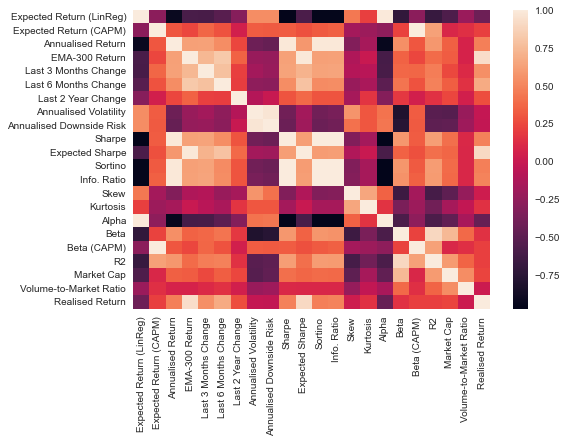

In [165]:
sns.heatmap(assets.corr())

In [166]:
corr=assets.corr()

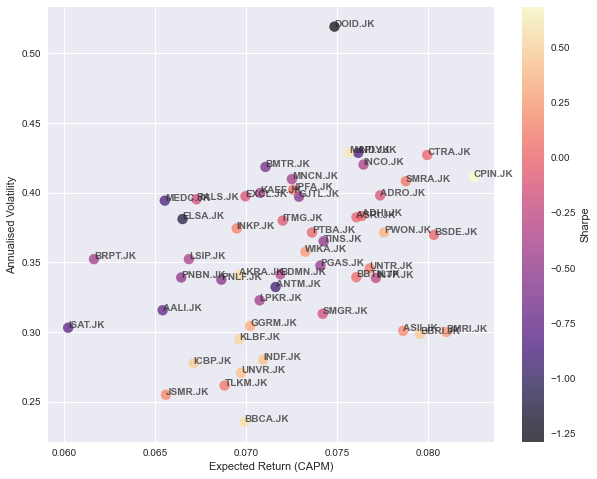

In [167]:
fig, ax = plt.subplots()
X = 'Expected Return (CAPM)'
Y = 'Annualised Volatility'
C = 'Sharpe'
ax= assets.plot.scatter(x=X, y=Y, c=C, 
                                           cmap= 'magma', marker='.', 
                                           s=400, alpha=0.7, grid=True, 
                                           figsize=[10,8], ax=ax)
label_point(assets[X], assets[Y], assets.index.to_series(), ax)

In [168]:
arr_scaled = scaler.fit_transform(assets)
assets_scaled = pd.DataFrame(arr_scaled, columns=assets.columns,index=assets.index)
assets_scaled = assets_scaled.sort_values(by='Annualised Volatility', ascending=False)
assets_scaled.corr()

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Expected Return (LinReg),1.000000,-0.283911,-0.927008,-0.597989,-0.600634,-0.526519,-0.313035,0.528414,0.534337,-0.965228,...,-0.958642,0.437143,0.205939,0.985885,-0.718265,-0.283911,-0.692621,-0.572442,-0.215283,-0.427661
Expected Return (CAPM),-0.283911,1.000000,0.297200,0.235191,0.365654,0.286095,0.044111,0.320338,0.312522,0.324589,...,0.341224,-0.170733,-0.208311,-0.275767,0.221114,1.000000,0.626707,0.088214,0.141520,0.210651
Annualised Return,-0.927008,0.297200,1.000000,0.620976,0.625041,0.530659,0.239134,-0.427271,-0.460968,0.981149,...,0.980603,-0.326683,-0.160760,-0.943641,0.542337,0.297200,0.576997,0.335831,0.064417,0.472714
EMA-300 Return,-0.597989,0.235191,0.620976,1.000000,0.729484,0.820209,0.348764,-0.228327,-0.244414,0.627172,...,0.628165,-0.125867,-0.002214,-0.609016,0.348612,0.235191,0.385656,0.321992,0.066876,0.923136
Last 3 Months Change,-0.600634,0.365654,0.625041,0.729484,1.000000,0.779803,0.207319,-0.179770,-0.228799,0.636358,...,0.639416,-0.098706,-0.077240,-0.607263,0.368634,0.365654,0.463893,0.248374,0.108157,0.542274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beta (CAPM),-0.283911,1.000000,0.297200,0.235191,0.365654,0.286095,0.044111,0.320338,0.312522,0.324589,...,0.341224,-0.170733,-0.208311,-0.275767,0.221114,1.000000,0.626707,0.088214,0.141520,0.210651
R2,-0.692621,0.626707,0.576997,0.385656,0.463893,0.474272,0.148749,-0.522777,-0.495991,0.606068,...,0.595052,-0.608613,-0.403286,-0.587420,0.894039,0.626707,1.000000,0.597346,0.351755,0.205623
Market Cap,-0.572442,0.088214,0.335831,0.321992,0.248374,0.330942,0.240686,-0.537943,-0.482957,0.398147,...,0.380588,-0.492846,-0.167163,-0.484509,0.743008,0.088214,0.597346,1.000000,0.532792,0.231983
Volume-to-Market Ratio,-0.215283,0.141520,0.064417,0.066876,0.108157,0.145390,0.041534,-0.222034,-0.200707,0.097878,...,0.089965,-0.241971,-0.030835,-0.159465,0.373962,0.141520,0.351755,0.532792,1.000000,0.014289


In [169]:
cor_target=abs(corr['Realised Return'])
relevant_features = cor_target[cor_target>0.4]
relevant_features

Expected Return (LinReg)    0.427661
Annualised Return           0.472714
EMA-300 Return              0.923136
Last 3 Months Change        0.542274
Last 6 Months Change        0.668234
Sharpe                      0.477051
Expected Sharpe             0.902750
Sortino                     0.467023
Info. Ratio                 0.483064
Alpha                       0.460767
Realised Return             1.000000
Name: Realised Return, dtype: float64

## **K-Means Clustering**

In [170]:
from sklearn.decomposition import PCA

def getPCA(df):
    pca = PCA(n_components=2)

    pComponents = pca.fit_transform(df)

    df_PCA = pd.DataFrame(data = pComponents, index=df.index,
                          columns = ['Principal Component 1', 'Principal Component 2'])
    return df_PCA

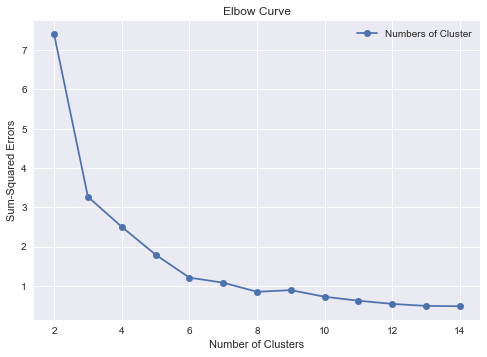

In [171]:
from sklearn.cluster import MiniBatchKMeans


unscaled_X = corr_matrix
scaled_X = scaler.fit_transform(unscaled_X)
scaled_X = pd.DataFrame(scaled_X, columns=unscaled_X.columns, index=unscaled_X.index)

cluster_vars = getPCA(scaled_X)

X = cluster_vars.values 

max_cluster = 15

sse_cluster = []

for k in range(2, max_cluster):
    kmeans =MiniBatchKMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse_cluster.append(kmeans.inertia_)
    
plt.plot(range(2, max_cluster), sse_cluster, marker ='o', label='Numbers of Cluster')
#plt.plot(5, 1.55, marker='v', c='r', ms=20, label='Ideal Cluster')
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum-Squared Errors')
plt.legend()
plt.show()

In [172]:
cluster_vars

,Principal Component 1,Principal Component 2
AALI.JK,-0.473843,0.207948
ADHI.JK,0.382698,-0.077976
ADRO.JK,-0.278942,0.659403
AKRA.JK,-0.031753,-0.195963
ANTM.JK,-0.196041,0.667716
...,...,...
TINS.JK,-0.122203,0.663579
TLKM.JK,0.175964,-0.139035
UNTR.JK,0.069019,0.405203
UNVR.JK,0.100925,-0.222367


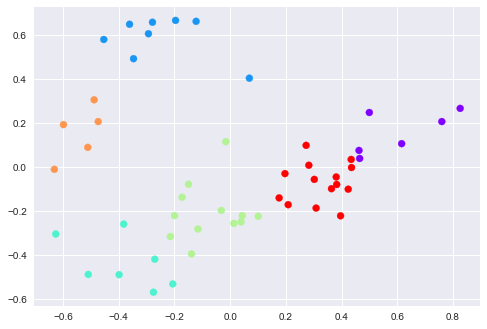

In [173]:
kmeans = MiniBatchKMeans(n_clusters=6, random_state=4567).fit(X)

centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [174]:
cluster_labels = pd.DataFrame(kmeans.labels_, index= cluster_vars.index, columns=['Cluster Group'])
cluster_labels

,Cluster Group
AALI.JK,4
ADHI.JK,5
ADRO.JK,1
AKRA.JK,3
ANTM.JK,1
...,...
TINS.JK,1
TLKM.JK,5
UNTR.JK,1
UNVR.JK,3


In [175]:
assets_cluster = pd.concat([assets, cluster_labels], axis=1)

In [176]:
assets_cluster_scaled = pd.concat([assets_scaled, cluster_labels], axis=1)

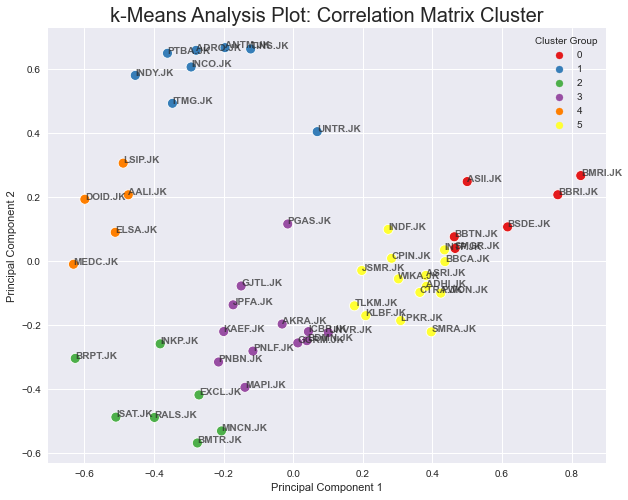

In [177]:
data_plot=cluster_vars.join(cluster_labels)

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x=data_plot.iloc[:,0], y=data_plot.iloc[:,1], 
                data=data_plot, hue='Cluster Group', s=100,
                palette='Set1')
ax.set_title('k-Means Analysis Plot: Correlation Matrix Cluster', fontsize=20)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
label_point(data_plot.iloc[:,0], data_plot.iloc[:,1],
             data_plot.index.to_series(), ax)

In [178]:
kmeans_mean = assets_cluster.groupby(['Cluster Group']).median()#.sort_values(by='Ann Returns', ascending=False)
kmeans_mean

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.026691,0.079092,0.069958,-0.036654,0.117360,0.072917,0.184672,0.306916,0.197891,0.087709,...,-0.028402,0.044733,0.766112,0.000096,0.368767,0.968174,0.577439,1.362050e+14,0.007447,-0.236777
1,0.071023,0.075212,-0.057995,-0.144847,-0.189051,-0.135646,0.120878,0.375621,0.237545,-0.244264,...,-0.334859,0.161857,0.749059,0.000217,0.226664,0.863371,0.440529,3.473000e+13,0.004256,-0.075297
2,0.081104,0.069492,-0.103649,-0.461121,-0.088411,-0.135720,-0.156899,0.395191,0.248059,-0.402871,...,-0.493256,0.214990,1.059499,0.000235,0.178199,0.708887,0.352212,2.870000e+13,0.001877,-0.515901
3,0.060024,0.070508,-0.001426,-0.000915,0.011541,0.058178,0.110369,0.341235,0.215649,-0.135136,...,-0.235419,0.176802,1.113266,0.000177,0.234434,0.736333,0.404594,2.039500e+13,0.002377,-0.116442
4,0.107883,0.066518,-0.304167,-0.299898,-0.179118,-0.242007,-0.208268,0.380987,0.237829,-0.881311,...,-0.975241,0.260171,1.244276,0.000349,0.166802,0.628564,0.322926,7.370000e+12,0.007835,-0.348137
5,0.024779,0.074660,0.073010,-0.054017,0.075968,0.045474,-0.017945,0.348158,0.217780,0.102766,...,-0.019402,0.083282,0.816152,0.000092,0.267783,0.848475,0.468476,2.573500e+13,0.005414,-0.179098


In [179]:
# actual_return = pd.DataFrame(columns= ['Actual Return (2020)'])
# for x in kmeans_mean.index:
#     sel = assets_cluster[assets_cluster['Cluster Group'] == x]
#     weights = np.ones(len(sel)) / len(sel)
#     actual_return.loc[x]=ret_2020[sel.index].dot(weights)

In [180]:
# kmeans_mean = kmeans_mean.join(actual_return)

In [181]:
kmeans_mean

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.026691,0.079092,0.069958,-0.036654,0.117360,0.072917,0.184672,0.306916,0.197891,0.087709,...,-0.028402,0.044733,0.766112,0.000096,0.368767,0.968174,0.577439,1.362050e+14,0.007447,-0.236777
1,0.071023,0.075212,-0.057995,-0.144847,-0.189051,-0.135646,0.120878,0.375621,0.237545,-0.244264,...,-0.334859,0.161857,0.749059,0.000217,0.226664,0.863371,0.440529,3.473000e+13,0.004256,-0.075297
2,0.081104,0.069492,-0.103649,-0.461121,-0.088411,-0.135720,-0.156899,0.395191,0.248059,-0.402871,...,-0.493256,0.214990,1.059499,0.000235,0.178199,0.708887,0.352212,2.870000e+13,0.001877,-0.515901
3,0.060024,0.070508,-0.001426,-0.000915,0.011541,0.058178,0.110369,0.341235,0.215649,-0.135136,...,-0.235419,0.176802,1.113266,0.000177,0.234434,0.736333,0.404594,2.039500e+13,0.002377,-0.116442
4,0.107883,0.066518,-0.304167,-0.299898,-0.179118,-0.242007,-0.208268,0.380987,0.237829,-0.881311,...,-0.975241,0.260171,1.244276,0.000349,0.166802,0.628564,0.322926,7.370000e+12,0.007835,-0.348137
5,0.024779,0.074660,0.073010,-0.054017,0.075968,0.045474,-0.017945,0.348158,0.217780,0.102766,...,-0.019402,0.083282,0.816152,0.000092,0.267783,0.848475,0.468476,2.573500e+13,0.005414,-0.179098


In [182]:
kmeans_scaled = scaler.fit_transform(kmeans_mean)
kmeans_mean_scaled = pd.DataFrame(kmeans_scaled, columns=assets.columns,index=kmeans_mean.index)

In [183]:
kmeans_mean_scaled

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.023012,1.000000,0.991908,0.922340,1.000000,1.000000,1.000000,0.000000,0.000000,0.984699,...,0.990584,0.000000,0.034436,0.017640,1.000000,1.000000,1.000000,1.000000,0.934923,0.633504
1,0.556468,0.691403,0.652670,0.687243,0.000000,0.337737,0.837649,0.778305,0.790433,0.647355,...,0.669968,0.543658,0.000000,0.488910,0.296396,0.691403,0.462073,0.212365,0.399313,1.000000
2,0.677773,0.236515,0.531630,0.000000,0.328448,0.337502,0.130729,1.000000,1.000000,0.486181,...,0.504254,0.790284,0.626877,0.557565,0.056430,0.236515,0.115068,0.165561,0.000000,0.000000
3,0.424109,0.317332,0.802649,1.000000,0.654650,0.953197,0.810904,0.388774,0.353975,0.758248,...,0.774003,0.613027,0.735449,0.333206,0.334868,0.317332,0.320881,0.101098,0.083888,0.906618
4,1.000000,0.000000,0.000000,0.350327,0.032416,0.000000,0.000000,0.839091,0.796078,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.380760
5,0.000000,0.647541,1.000000,0.884612,0.864914,0.912858,0.484355,0.467195,0.396461,1.000000,...,1.000000,0.178934,0.135482,0.000000,0.499991,0.647541,0.571876,0.142547,0.593697,0.764413


<AxesSubplot:xlabel='Cluster Group'>

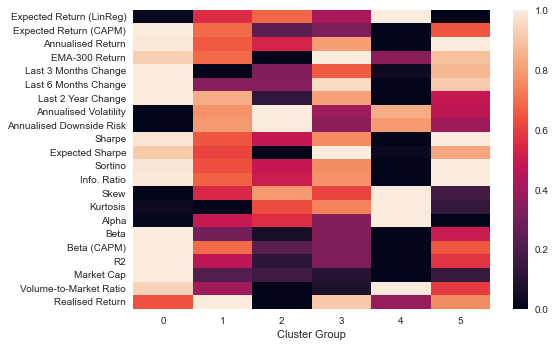

In [184]:
sns.heatmap(kmeans_mean_scaled.T)

In [185]:
cluster_method= assets_cluster
cluster_mean = kmeans_mean

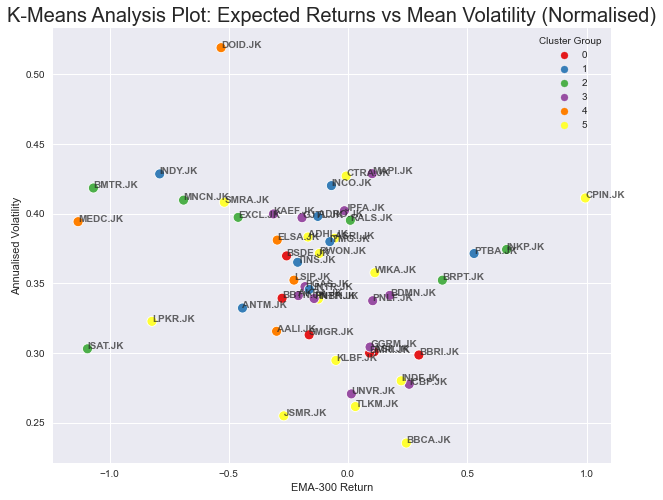

In [186]:
data_plot=assets_cluster
X='EMA-300 Return'
Y='Annualised Volatility'

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x=X, y=Y, 
                data=data_plot, 
                hue='Cluster Group', s=100, 
                palette='Set1')
ax.set_title('K-Means Analysis Plot: Expected Returns vs Mean Volatility (Normalised)', fontsize=20)
label_point(data_plot[X], data_plot[Y],
            data_plot.index.to_series(), ax)

In [187]:
cluster_method= assets_cluster
cluster_mean = kmeans_mean
picking_param = 'Sharpe'
kmeans_portfolio=pd.DataFrame()
# for cluster in cluster_mean.index:
#     kmeans_portfolio=kmeans_portfolio.append(cluster_method[cluster_method['Cluster Group']==cluster].sort_values(by=picking_param, ascending=False).iloc[0])

In [188]:
kmeans_portfolio = cluster_method[cluster_method['Cluster Group']==cluster_mean[picking_param].idxmax()]

## **Agglomerative Clustering**

In [189]:
from sklearn.cluster import AgglomerativeClustering

assets_PCA = getPCA(dist_matrix)
assets_PCA

,Principal Component 1,Principal Component 2
AALI.JK,0.492122,-0.047496
ADHI.JK,-0.352261,-0.026530
ADRO.JK,0.496282,-0.483625
AKRA.JK,-0.048139,0.176268
ANTM.JK,0.433892,-0.496396
...,...,...
TINS.JK,0.369906,-0.503750
TLKM.JK,-0.214618,0.027759
UNTR.JK,0.092701,-0.365122
UNVR.JK,-0.173785,0.137431


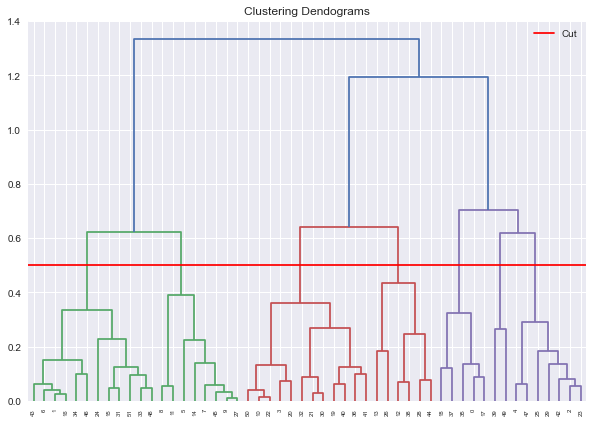

In [190]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))  
plt.title('Clustering Dendograms')
plt.axhline(y=.5, color='r', linestyle='-', label='Cut')
plt.legend()
dend = dendrogram(linkage(assets_PCA, method='complete', metric='euclidean'))

In [191]:
# cluster_vars = assets_PCA

# X = cluster_vars.values 

# max_cluster = 10

# sse = []

# for k in range(2, max_cluster):
#     agg =AgglomerativeClustering(n_clusters = k)
#     agg.fit(X)
    
#     sse.append(agg.inertia_)
    
# plt.plot(range(2, max_cluster), sse, marker ='s')
# plt.title("Elbow Curve")
# plt.show()

In [192]:
X_pca = assets_PCA.values

In [193]:
agg_pca = AgglomerativeClustering(n_clusters=7, linkage='complete').fit(X_pca)

In [194]:
cluster_labels_pca = pd.DataFrame(agg_pca.labels_, index= assets_PCA.index, columns=['Cluster Group'])
assets_scaled_cluster_pca = pd.concat([assets_scaled, cluster_labels_pca], axis=1)
assets_scaled_cluster_pca #.sort_values(by='Annualised Returns', ascending=False).head(10)

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return,Cluster Group
DOID.JK,1.000000,0.656234,0.000000,0.281903,0.469881,0.477482,0.462156,1.000000,1.000000,0.000000,...,0.648855,0.366294,0.983500,0.000000,0.656234,0.116062,0.000611,0.264675,0.332201,3
MAPI.JK,0.283852,0.691989,0.972492,0.579675,0.796924,0.560906,0.423790,0.681308,0.570507,0.955006,...,1.000000,1.000000,0.135314,0.166026,0.691989,0.317456,0.012448,0.156075,0.631508,1
INDY.JK,0.888925,0.714626,0.316635,0.160905,0.151719,0.158868,0.877915,0.680720,0.670976,0.217755,...,0.531020,0.275197,0.892234,0.169945,0.714626,0.334627,0.006411,0.103728,0.117016,4
CTRA.JK,0.546476,0.884671,0.697641,0.528607,0.986491,0.606204,0.300397,0.675372,0.592173,0.646085,...,0.344356,0.035944,0.481997,0.232697,0.884671,0.460594,0.020031,0.112089,0.418083,5
INCO.JK,0.692817,0.727723,0.543157,0.499373,0.410627,0.436339,0.406343,0.651066,0.562400,0.468794,...,0.564222,0.124228,0.654047,0.194217,0.727723,0.364916,0.061317,0.070717,0.552925,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICBP.JK,0.246644,0.309504,0.838340,0.652717,0.786698,0.617441,0.382331,0.148618,0.129612,0.886021,...,0.298631,0.147038,0.189928,0.527848,0.309504,0.458193,0.121137,0.062008,0.600260,1
UNVR.JK,0.206282,0.426262,0.818831,0.538766,0.566470,0.525043,0.539251,0.124303,0.123828,0.857208,...,0.288510,0.206053,0.179153,0.669735,0.426262,0.623722,0.191633,0.054076,0.411553,1
TLKM.JK,0.375257,0.385456,0.723649,0.546684,0.726096,0.629443,0.343461,0.092310,0.100121,0.688968,...,0.000000,0.121472,0.400128,0.705169,0.385456,0.622761,0.408948,0.646206,0.465677,5
JSMR.JK,0.369194,0.240944,0.741384,0.405504,0.592989,0.544112,0.533386,0.068790,0.000000,0.723400,...,0.344005,0.133137,0.369067,0.621103,0.240944,0.484163,0.033702,0.047048,0.245920,5


In [195]:
assets_cluster_pca = pd.concat([assets, cluster_labels_pca], axis=1)
assets_cluster_pca

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return,Cluster Group
AALI.JK,0.100230,0.065425,-0.189512,-0.299898,-0.179118,-0.242007,-0.208268,0.315563,0.215166,-0.737586,...,-0.036144,0.968615,0.000349,0.231973,0.599067,0.372112,1.636000e+13,0.000373,-0.304223,3
ADHI.JK,0.045403,0.076370,0.047507,-0.168100,0.118582,-0.134330,-0.345810,0.383201,0.230717,0.011125,...,0.276493,1.143866,0.000122,0.235061,0.894652,0.457445,2.920000e+12,0.004628,-0.243048,5
ADRO.JK,0.060379,0.077363,-0.005975,-0.126994,-0.240532,-0.072878,0.207734,0.397966,0.250094,-0.123676,...,0.047351,0.716541,0.000179,0.224067,0.921472,0.452733,4.318000e+13,0.014069,0.000839,4
AKRA.JK,0.003172,0.069619,0.233818,-0.208725,0.007334,-0.124715,0.078596,0.341126,0.205966,0.558664,...,0.147364,0.563300,-0.000054,0.236241,0.712328,0.409453,1.476000e+13,0.002650,-0.391959,1
ANTM.JK,0.124489,0.071623,-0.266899,-0.442923,-0.317714,-0.290254,-0.626273,0.332240,0.204555,-0.933488,...,0.230408,1.235159,0.000466,0.267681,0.766450,0.452014,6.224000e+13,0.011278,-0.151434,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TINS.JK,0.092128,0.074266,-0.146644,-0.211581,-0.175633,-0.259283,-0.559215,0.365075,0.207026,-0.520131,...,0.370618,0.817716,0.000320,0.242049,0.837835,0.448721,1.143000e+13,0.004331,-0.164947,4
TLKM.JK,0.023772,0.068825,0.061254,0.030536,0.010929,0.065498,-0.025337,0.261572,0.173712,0.068853,...,-0.104135,0.753754,0.000101,0.390860,0.690880,0.518892,3.298800e+14,0.024632,-0.075694,5
UNTR.JK,0.031213,0.076790,0.077322,-0.162700,-0.099291,-0.055941,0.421683,0.345584,0.220376,0.098610,...,0.017039,0.426291,0.000088,0.292706,0.905988,0.513629,7.917000e+13,0.001092,-0.158581,6
UNVR.JK,-0.007035,0.069734,0.151572,0.013692,-0.097049,-0.077183,0.382871,0.270647,0.177563,0.400256,...,0.088488,0.996231,-0.000033,0.377339,0.715428,0.519267,1.556500e+14,0.002309,-0.186890,1


<AxesSubplot:>

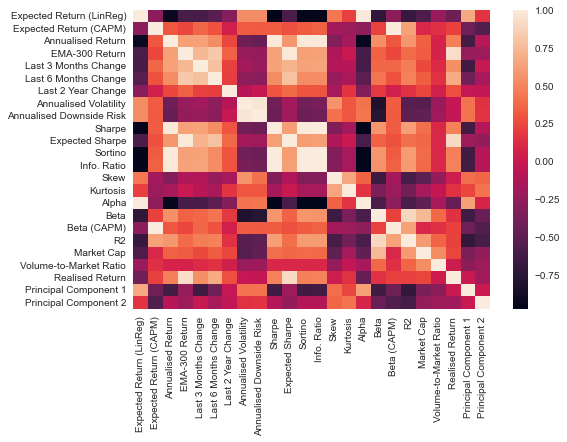

In [196]:
sns.heatmap(assets_scaled_cluster_pca.drop('Cluster Group',axis=1).join(assets_PCA).corr())

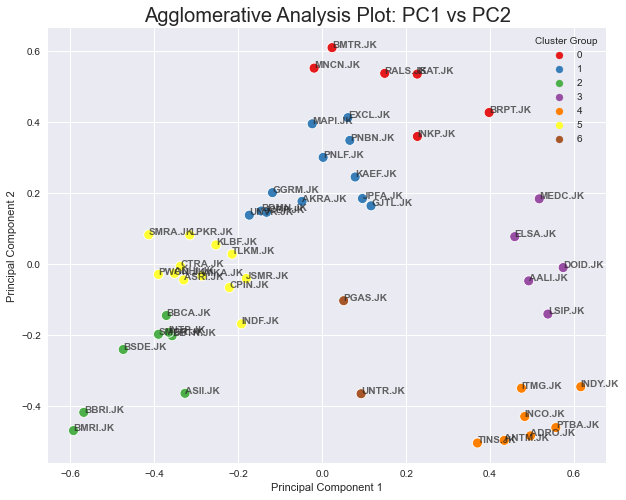

In [197]:
data_plot=assets_PCA.join(cluster_labels_pca)

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', 
                data=data_plot, hue='Cluster Group', s=100, 
                palette='Set1')
ax.set_title('Agglomerative Analysis Plot: PC1 vs PC2', fontsize=20)
label_point(data_plot['Principal Component 1'], data_plot['Principal Component 2'],
            data_plot.index.to_series(), ax)

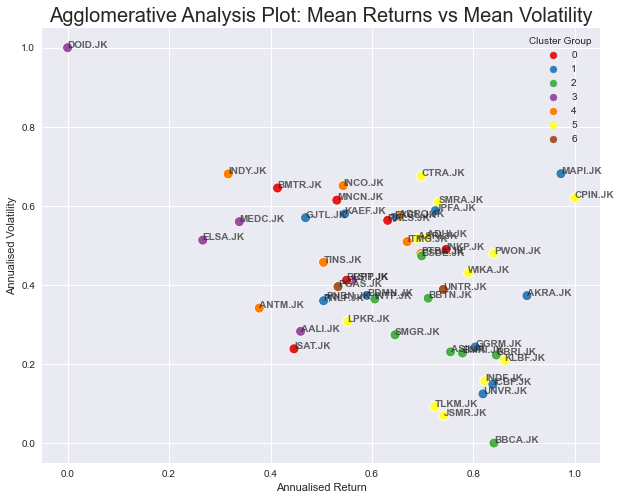

In [198]:
data_plot=assets_scaled_cluster_pca
X= 'Annualised Return'
Y= 'Annualised Volatility'

fig, ax = plt.subplots(figsize = [10,8])
sns.set_style('darkgrid')
ax = sns.scatterplot(x=X, y=Y, 
                data=data_plot, hue='Cluster Group', s=100, 
                palette='Set1')
ax.set_title('Agglomerative Analysis Plot: Mean Returns vs Mean Volatility', fontsize=20)
label_point(data_plot[X], data_plot[Y],
            data_plot.index.to_series(), ax)

In [199]:
cluster_pca_mean = assets_cluster_pca.groupby(['Cluster Group']).median() #.sort_values(by='Alpha', ascending=False)
cluster_pca_mean

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.081111,0.068385,-0.112723,-0.340311,-0.053610,-0.180271,-0.178209,0.384724,0.241872,-0.409949,...,-0.507702,0.221674,1.111288,0.000241,0.174708,0.678999,0.336652,2.379000e+13,0.003303,-0.285063
1,0.058355,0.070100,0.023706,-0.000915,0.011541,0.053362,0.145812,0.341235,0.216442,-0.049464,...,-0.142107,0.176802,1.113266,0.000153,0.221554,0.725328,0.399147,2.039500e+13,0.002288,-0.116442
2,0.026691,0.077879,0.069958,-0.017246,0.085691,0.135180,0.210081,0.306916,0.197891,0.087709,...,-0.028402,0.012110,0.770612,0.000096,0.368767,0.935407,0.566117,1.362050e+14,0.007447,-0.231510
3,0.107883,0.066518,-0.304167,-0.299898,-0.179118,-0.242007,-0.208268,0.380987,0.237829,-0.881311,...,-0.975241,0.260171,1.244276,0.000349,0.166802,0.628564,0.322926,7.370000e+12,0.007835,-0.348137
4,0.081668,0.074266,-0.110015,-0.126994,-0.202469,-0.198414,0.105767,0.379889,0.239366,-0.364852,...,-0.453000,0.230408,0.761656,0.000255,0.224067,0.837835,0.432338,2.628000e+13,0.004331,0.000839
5,0.024779,0.074660,0.073010,-0.054017,0.079303,0.037243,-0.058606,0.364490,0.217780,0.102766,...,-0.019402,0.107169,0.854331,0.000092,0.252414,0.848475,0.463304,2.025500e+13,0.005414,-0.179098
6,0.058720,0.075437,-0.021117,-0.171740,-0.106281,0.056372,-0.159870,0.346594,0.222058,-0.184866,...,-0.291699,0.037930,0.638500,0.000197,0.279455,0.869466,0.491678,5.237000e+13,0.005508,-0.209906


In [200]:
pca_scaled = scaler.fit_transform(cluster_pca_mean)
pca_mean_scaled = pd.DataFrame(pca_scaled, columns=assets.columns,index=cluster_pca_mean.index)

In [201]:
pca_mean_scaled

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.677853,0.164368,0.507571,0.000000,0.516585,0.163675,0.071850,1.000000,1.000000,0.478989,...,0.489140,0.844808,0.780466,0.581629,0.039145,0.164368,0.056443,0.127450,0.182906,0.180739
1,0.404029,0.315353,0.869281,1.000000,0.742679,0.783083,0.846374,0.441074,0.421795,0.845307,...,0.871626,0.663918,0.783731,0.238550,0.271093,0.315353,0.313423,0.101098,0.000000,0.663927
2,0.023012,1.000000,0.991908,0.951883,1.000000,1.000000,1.000000,0.000000,0.000000,0.984699,...,0.990584,0.000000,0.218087,0.017640,1.000000,1.000000,1.000000,1.000000,0.930094,0.334196
3,1.000000,0.000000,0.000000,0.119073,0.081035,0.000000,0.000000,0.951971,0.908066,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.684557,0.682014,0.514751,0.628518,0.000000,0.115576,0.750652,0.937860,0.943030,0.524815,...,0.546369,0.880018,0.203303,0.636922,0.283540,0.682014,0.449904,0.146777,0.368190,1.000000
5,0.000000,0.716691,1.000000,0.843539,0.977832,0.740350,0.357744,0.739950,0.452233,1.000000,...,1.000000,0.383208,0.356289,0.000000,0.423894,0.716691,0.577237,0.100012,0.563546,0.484384
6,0.408415,0.785098,0.750445,0.496679,0.333801,0.791064,0.115686,0.509947,0.549488,0.707714,...,0.715122,0.104088,0.000000,0.409892,0.557782,0.785098,0.693907,0.349284,0.580440,0.396102


In [202]:
assets_scaled_cluster_pca.groupby(['Cluster Group']).var()

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.012392,0.051417,0.014918,0.127308,0.074196,0.032602,0.113264,0.022849,0.025882,0.027804,...,0.029232,0.016432,0.027268,0.018605,0.001968,0.051417,0.011678,0.001838,0.025448,0.142329
1,0.049797,0.013122,0.029738,0.010211,0.015109,0.010291,0.021022,0.033652,0.027491,0.054407,...,0.054169,0.055835,0.062058,0.063847,0.028697,0.013122,0.015878,0.003288,0.006175,0.016074
2,0.050862,0.027349,0.007463,0.011122,0.007160,0.015900,0.018005,0.019716,0.021632,0.021370,...,0.019878,0.010334,0.002371,0.052784,0.044167,0.027349,0.024496,0.120985,0.102637,0.017024
3,0.015718,0.031755,0.045772,0.030754,0.044663,0.040722,0.021287,0.073598,0.072073,0.030621,...,0.029008,0.048213,0.023997,0.018382,0.012646,0.031755,0.005729,0.000060,0.013692,0.018240
4,0.026743,0.010082,0.021882,0.035681,0.040973,0.037718,0.074548,0.013838,0.019763,0.035498,...,0.036519,0.031617,0.008024,0.043771,0.005348,0.010082,0.003133,0.000688,0.016637,0.050811
5,0.024843,0.053050,0.012382,0.041872,0.044809,0.032077,0.017464,0.046447,0.043195,0.022692,...,0.023151,0.031532,0.006393,0.033587,0.026752,0.053050,0.004774,0.013152,0.051878,0.044463
6,0.045524,0.007371,0.021524,0.000036,0.000214,0.013507,0.155608,0.000025,0.000214,0.041420,...,0.042125,0.001958,0.010959,0.063908,0.002412,0.007371,0.006327,0.002235,0.027441,0.001248


In [203]:
# actual_return = pd.DataFrame(columns= ['Actual Return (2020)'])
# for x in cluster_pca_mean.index:
#     sel = assets_scaled_cluster_pca[assets_scaled_cluster_pca['Cluster Group'] == x]
#     weights = np.ones(len(sel)) / len(sel)
#     actual_return.loc[x]=ret_2020[sel.index].dot(weights)

In [204]:
# actual_return_sort=actual_return.sort_values(by='Actual Return (2020)', ascending=False)
# actual_return_sort

In [205]:
pca_cluster_mean = pca_mean_scaled#.join(actual_return)#.sort_values(by='Alpha', ascending=False)
pca_cluster_mean

,Expected Return (LinReg),Expected Return (CAPM),Annualised Return,EMA-300 Return,Last 3 Months Change,Last 6 Months Change,Last 2 Year Change,Annualised Volatility,Annualised Downside Risk,Sharpe,...,Info. Ratio,Skew,Kurtosis,Alpha,Beta,Beta (CAPM),R2,Market Cap,Volume-to-Market Ratio,Realised Return
Cluster Group,,,,,,,,,,,,,,,,,,,,,
0,0.677853,0.164368,0.507571,0.000000,0.516585,0.163675,0.071850,1.000000,1.000000,0.478989,...,0.489140,0.844808,0.780466,0.581629,0.039145,0.164368,0.056443,0.127450,0.182906,0.180739
1,0.404029,0.315353,0.869281,1.000000,0.742679,0.783083,0.846374,0.441074,0.421795,0.845307,...,0.871626,0.663918,0.783731,0.238550,0.271093,0.315353,0.313423,0.101098,0.000000,0.663927
2,0.023012,1.000000,0.991908,0.951883,1.000000,1.000000,1.000000,0.000000,0.000000,0.984699,...,0.990584,0.000000,0.218087,0.017640,1.000000,1.000000,1.000000,1.000000,0.930094,0.334196
3,1.000000,0.000000,0.000000,0.119073,0.081035,0.000000,0.000000,0.951971,0.908066,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.684557,0.682014,0.514751,0.628518,0.000000,0.115576,0.750652,0.937860,0.943030,0.524815,...,0.546369,0.880018,0.203303,0.636922,0.283540,0.682014,0.449904,0.146777,0.368190,1.000000
5,0.000000,0.716691,1.000000,0.843539,0.977832,0.740350,0.357744,0.739950,0.452233,1.000000,...,1.000000,0.383208,0.356289,0.000000,0.423894,0.716691,0.577237,0.100012,0.563546,0.484384
6,0.408415,0.785098,0.750445,0.496679,0.333801,0.791064,0.115686,0.509947,0.549488,0.707714,...,0.715122,0.104088,0.000000,0.409892,0.557782,0.785098,0.693907,0.349284,0.580440,0.396102


<AxesSubplot:xlabel='Cluster Group'>

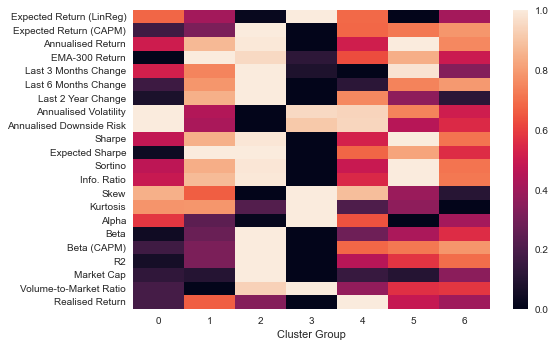

In [206]:
sns.heatmap(pca_cluster_mean.T)

<AxesSubplot:>

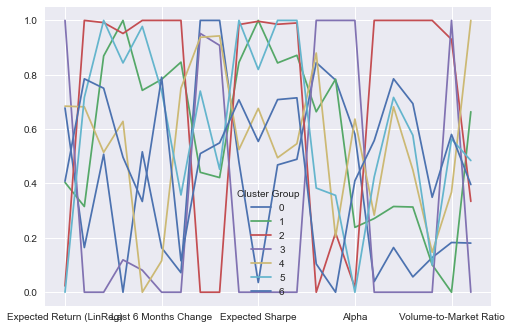

In [207]:
pca_cluster_mean.T.plot()

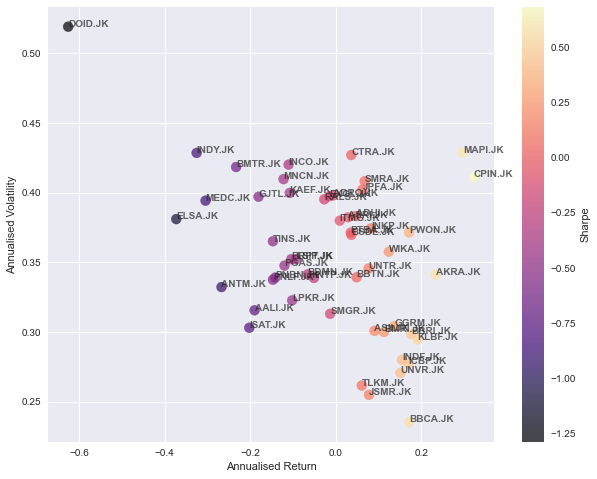

In [208]:
fig, ax = plt.subplots()
data_plot = assets_cluster_pca
X = 'Annualised Return'
Y = 'Annualised Volatility'
C = 'Sharpe'
ax= data_plot.plot.scatter(x=X, y=Y, c=C, 
                                           cmap= 'magma', marker='.', 
                                           s=400, alpha=0.7, grid=True, 
                                           figsize=[10,8], ax=ax)
label_point(data_plot[X], data_plot[Y], assets.index.to_series(), ax)

In [209]:
cluster_method= assets_cluster_pca
cluster_mean = pca_cluster_mean
picking_param = 'Sharpe'
pca_portfolio=pd.DataFrame()
# for cluster in cluster_mean.index:
#     pca_portfolio=pca_portfolio.append(cluster_method[cluster_method['Cluster Group']==cluster].sort_values(by=picking_param, ascending=False).iloc[0])

In [210]:
pca_portfolio=cluster_method[cluster_method['Cluster Group']==cluster_mean[picking_param].idxmax()]

# **Hierchical Risk Parity**

In [211]:
import scipy.cluster.hierarchy as sch

class HRPRes:
    def __init__(self, cov, corr, dist, link):
        self.cov = cov
        self.corr = corr
        self.dist = dist
        self.link = link

def HRP(assets_returns):
    rets = assets_returns

    ewm_cov = rets.ewm(span=300).cov()
    cov = ewm_cov.loc[ewm_cov.index.levels[0][-1]]

    ewm_corr = rets.ewm(span=300).corr()
    corr = ewm_corr.loc[ewm_corr.index.levels[0][-1]]

    dist=((1-corr)/2.)**.5

    link=sch.linkage(dist, 'single')
    
    return HRPRes(cov=cov, corr=corr, dist=dist, link=link)

In [212]:
def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

In [213]:
def getHRP(assets_rets):
    HRPres = HRP(assets_rets)
    sortIx=getQuasiDiag(HRPres.link)
    sortIx = HRPres.corr.index[sortIx].tolist()
    return getRecBipart(HRPres.cov, sortIx)

In [214]:
rand_assets = assets.sample(n=5)
rand_rets = ret[rand_assets.index]
getHRP(rand_rets)

/var/folders/mr/29v91m2x65xbxjv6gbvs3s600000gn/T/ipykernel_17989/2968485359.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link=sch.linkage(dist, 'single')


RALS.JK    0.204407
ITMG.JK    0.195980
PWON.JK    0.179384
AKRA.JK    0.169122
JSMR.JK    0.251107
dtype: float64

# **Markowitz Optimisation**

In [215]:
rng = np.random.default_rng(seed=4567)

class ReturnRes:
    def __init__(self, port, weights):
        self.port = port
        self.weights = weights
        
def monte_carlo_optimise (_assets, num_port):
    rf_rate = rate_bond.mean()  # Average risk-free rate in Indonesia from average return of gov't bonds
    assets_sel = _assets
    ret_assets = ret[assets_sel.index]
    mean_ret = ret_assets.ewm(span=300).mean().iloc[-1]
    exp_ret_assets = assets_sel['EMA-300 Return']
    _real_ret = real_ret[assets_sel.index]
    ewm_cov = ret_assets.ewm(span=300).cov()
    cov = ewm_cov.loc[ewm_cov.index.levels[0][-1]]
    semicov = ret_assets[ret_assets < 0].cov()
    num_assets = len(assets_sel.index)
    num_portfolios = num_port
    beta_assets = assets_sel['Beta']
    alpha_assets = assets_sel['Alpha']
    rand_weights = rng.random(size=(num_portfolios, num_assets)).round(2)
    _weights = pd.DataFrame((rand_weights.T / rand_weights.sum(axis=1)).T, columns=assets_sel.index)
    p_ret =mean_ret.dot(_weights.T)*252
    p_real_ret = _weights.dot(_real_ret)
    p_exp_ret = _weights.dot(exp_ret_assets)
    p_vol =_weights.apply(lambda row: np.sqrt(row.T@cov@row), axis=1)
    p_dsrisk =_weights.apply(lambda row: row.dot(semicov.dot(row.T))**0.5, axis=1)
    p_premium =p_ret - rf_rate
    p_sharpe =p_premium / (p_vol*np.sqrt(252))
    p_sortino =p_premium / (p_dsrisk*np.sqrt(252))
    p_beta =_weights.dot(beta_assets)
    p_alpha =_weights.dot(alpha_assets)
    p_weights = _weights.copy()
    p_weights.columns = pd.MultiIndex.from_product([_weights, ['Weights']])
    port_metrics = pd.DataFrame({'Annualised Return':p_ret,'Expected Return':p_exp_ret, 'Realised Return':p_real_ret, 'Volatility':p_vol, 
                                    'Downside Risk' : p_dsrisk, 'Market Risk Premium':p_premium, 
                                    'Sharpe' :p_sharpe, 'Sortino': p_sortino, 'Weighted Alpha': p_alpha,
                                    'Weighted Beta':p_beta})
    portfolios = port_metrics.copy()
    portfolios[p_weights.columns]  = p_weights
    
    return ReturnRes(port=portfolios, weights=_weights)

def equal_weights_port (_assets):
    rf_rate = rate_bond.mean()  # Average risk-free rate in Indonesia from average return of gov't bonds
    assets_sel = _assets
    ret_assets = ret[assets_sel.index]
    mean_ret = ret_assets.ewm(span=300).mean().iloc[-1]
    exp_ret_assets = assets_sel['EMA-300 Return']
    _real_ret = real_ret[assets_sel.index]
    ewm_cov = ret_assets.ewm(span=300).cov()
    cov = ewm_cov.loc[ewm_cov.index.levels[0][-1]]
    semicov = ret_assets[ret_assets < 0].cov()
    num_assets = len(assets_sel.index)
    beta_assets = assets_sel['Beta']
    alpha_assets = assets_sel['Alpha']
    test_weights_equal = np.ones(num_assets).round(2)*(1/num_assets)
    _weights = pd.Series(test_weights_equal, index=assets_sel.index)
    p_ret =mean_ret.dot(_weights)*252
    p_real_ret = _real_ret.dot(_weights)
    p_exp_ret = exp_ret_assets.dot(_weights)
    p_vol =_weights.T.dot(cov.dot(_weights))**0.5
    p_dsrisk =_weights.T.dot(semicov.dot(_weights))**0.5
    p_premium =p_ret - rf_rate
    p_sharpe =p_premium / (p_vol*np.sqrt(252))
    p_sortino =p_premium / (p_dsrisk*np.sqrt(252))
    p_beta =_weights.T.dot(beta_assets)
    p_alpha =_weights.T.dot(alpha_assets)
    #p_weights = _weights.copy()
    port_metrics = pd.Series({'Annualised Return':p_ret,'Expected Return':p_exp_ret, 'Realised Return':p_real_ret, 'Volatility':p_vol, 
                                    'Downside Risk' : p_dsrisk, 'Market Risk Premium':p_premium, 
                                    'Sharpe' :p_sharpe, 'Sortino': p_sortino, 'Weighted Alpha': p_alpha,
                                    'Weighted Beta':p_beta, 'Stocks':'Weights'})
    portfolios = port_metrics.copy()
    #portfolios=portfolios.append(_weights)
    
    return ReturnRes(port=portfolios, weights=_weights)


def HRP_port (_assets):
    rf_rate = rate_bond.mean()  # Average risk-free rate in Indonesia from average return of gov't bonds
    assets_sel = _assets
    ret_assets = ret[assets_sel.index]
    mean_ret = ret_assets.ewm(span=300).mean().iloc[-1]
    exp_ret_assets = assets_sel['EMA-300 Return']
    _real_ret = real_ret[assets_sel.index]
    ewm_cov = ret_assets.ewm(span=300).cov()
    cov = ewm_cov.loc[ewm_cov.index.levels[0][-1]]*252.
    semicov = ret_assets[ret_assets < 0].cov()*252.
    num_assets = len(assets_sel.index)
    beta_assets = assets_sel['Beta']
    alpha_assets = assets_sel['Alpha']
    _weights = getHRP(ret_assets)
    p_ret =mean_ret.dot(_weights)*252
    p_real_ret = _real_ret.dot(_weights)
    p_exp_ret = exp_ret_assets.dot(_weights)
    p_vol =_weights.T.dot((cov).dot(_weights))**0.5
    p_dsrisk =_weights.T.dot((semicov).dot(_weights))**0.5
    p_premium =p_ret - rf_rate
    p_sharpe =p_premium / (p_vol)
    p_sortino =p_premium / (p_dsrisk)
    p_beta =_weights.T.dot(beta_assets)
    p_alpha =_weights.T.dot(alpha_assets)
    #p_weights = _weights.copy()
    port_metrics = pd.Series({'Annualised Return':p_ret,'Expected Return':p_exp_ret, 'Realised Return':p_real_ret, 'Volatility':p_vol, 
                                    'Downside Risk' : p_dsrisk, 'Market Risk Premium':p_premium, 
                                    'Sharpe' :p_sharpe, 'Sortino': p_sortino, 'Weighted Alpha': p_alpha,
                                    'Weighted Beta':p_beta, 'Stocks':'Weights'})
    portfolios = port_metrics.copy()
    #portfolios=portfolios.append(_weights)
    
    return ReturnRes(port=portfolios, weights=_weights)

def min_volatility(portfolios):
    port = portfolios.port
    w = portfolios.weights
    idx=port['Volatility'].idxmin()
    return ReturnRes(port=port.iloc[idx], 
                     weights=w.iloc[idx])

def optimal_risk(portfolios):
    port = portfolios.port
    w = portfolios.weights
    idx = port['Sharpe'].idxmax()
    return ReturnRes(port=port.iloc[idx], 
                     weights=w.iloc[idx])

def high_alpha(portfolios):
    port = portfolios.port
    w = portfolios.weights
    idx = port['Weighted Alpha'].idxmax()
    return ReturnRes(port=port.iloc[idx], 
                        weights=w.loc[idx])

def plot_summarise(portfolios, Y ='Expected Return', X = 'Volatility', plot_opt=True, plot_min=False, plot_alpha=False):
    portfolio = portfolios.port
    plt.subplots(figsize=(10, 8))
    plt.scatter(portfolio[X], portfolio[Y], c= portfolio['Sharpe'],cmap='magma', marker='.', s=10, alpha=0.3)
    plt.colorbar().set_label('Sharpe')
    plt.xlabel(X)
    plt.ylabel(Y)
    
    if plot_opt==True:
        optimal_risky_port=optimal_risk(portfolios).port
        plt.scatter(optimal_risky_port[X], optimal_risky_port[Y], color='g', marker='^', s=200, label = 'Optimal Risky Portfolio - Maximum Sharpe Ratio')
    if plot_min==True:
        min_vol_port =min_volatility(portfolios).port
        plt.scatter(min_vol_port[X], min_vol_port[Y], color='r', marker='^', s=200, label= 'Minimum Volatility Portfolio')
    if plot_alpha==True:
        high_alpha_port = high_alpha(portfolios).port
        plt.scatter(high_alpha_port[X], high_alpha_port[Y], color='b', marker='^', s=200, label = 'High Alpha - Maximum Alpha')
    else:
        pass
    
    plt.legend(labelspacing=0.8, loc='lower left')
    plt.show()
    
def print_port(portfolios):
    portfolio = portfolios.port
    min_vol_port =min_volatility(portfolios).port
    optimal_risky_port=optimal_risk(portfolios).port
    high_alpha_port = high_alpha(portfolios).port
    print('-'*10)
    print('Optimally Risky Portfolio')
    print('-'*10)
    print(optimal_risky_port)
    print('-'*10)
    print('-'*10)
    print('Minimal Risk Portfolio')
    print('-'*10)
    print(min_vol_port)
    print('-'*10)
    print('-'*10)
    print('High Alpha Portfolio')
    print('-'*10)
    print(high_alpha_port)
    print('-'*10)

In [216]:
rand_assets = assets.sort_values(by='EMA-300 Return', ascending=False).head(10).sample(n=3)
num_port=5000

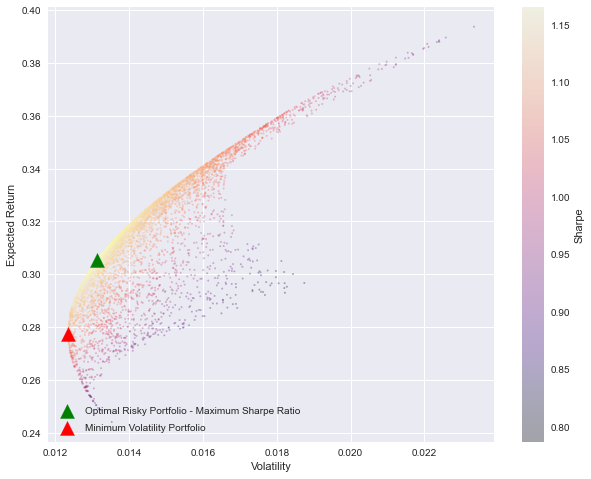

In [217]:
ran_port = monte_carlo_optimise(rand_assets,num_port=num_port)
ran_port.port
plot_summarise(ran_port, plot_min=True)

# **Testing 2019**

In [218]:
from scipy.stats import norm

def backtest(portfolios, plots=False, test_year = test_year, end_year=end_year, num_port=500000, initial_inv=1000000000, weights_equal=False, HRP=False):
    pd.options.display.max_rows = None
     
    if weights_equal==True:
        _port = equal_weights_port(portfolios)
        test_weights=_port.weights.values
        _weights=test_weights
    elif HRP==True:
        _port = HRP_port(portfolios)
        test_weights=_port.weights.values
        _weights=test_weights    
    else:
        rand_portfolios = monte_carlo_optimise(portfolios, num_port)
        optimal_risk_port = optimal_risk(rand_portfolios)
        _port = optimal_risk_port
        test_weights = _port.weights.values
        _weights = test_weights
        plot_summarise(rand_portfolios,plot_min=True)
        
    display(_port.port)
    display(_port.weights)
    _port_assets = portfolios
    _num_assets = len(_port_assets)
    test_yr = test_year #Training year + 1 year
    end_yr = end_year
    
    # Get price data
    port_close_price = close_price_all[_port_assets.index]
    test_close=port_close_price[test_yr:end_yr]
    test_ret = (test_close.iloc[-1] / test_close.iloc[0]) - 1
    test_ret_pct = test_ret
    ret_port_asset=log_rate(port_close_price).dropna()
    
    # Get market price data
    market_test = market_data_all['Close'][test_year:end_year]
    market_hold_ret = (market_test.iloc[-1] / market_test[0]) -1 
    market_cum_log_ret = log_rate(market_test).cumsum().ffill()
    market_log_ret = log_rate(market_test).sum()
    
    # Get unweighted mean and cov
    mean_ret_port=ret_port_asset.mean()
    cov_ret_port =ret_port_asset.cov()
    semicov_ret_port = ret_port_asset[ret_port_asset < 0].cov()
    
    # Calculate returns
    holding_ret_port = test_ret_pct.dot(_weights)
    log_rets = log_rate(test_close).dot(_weights)
    port_cum = log_rets.sum()
    log_rets_cum = log_rets.cumsum().ffill()
    max_drawdown = log_rets_cum.min()
    
    # Get monthly and yearly returns
    mon_rets = log_rets.resample('M').sum()
    quarter_rets = log_rets.resample('Q').sum()
    quarter_rets.index = quarter_rets.index.strftime('%m/%Y')
    mon_rets.index = mon_rets.index.strftime('%m/%Y')
    
    # Get weighted mean and cov
    mean_port = mean_ret_port.dot(_weights)
    stdev_port = np.sqrt(_weights.T.dot(cov_ret_port.dot(_weights))*252)
    semistdev_port = np.sqrt(_weights.T.dot(semicov_ret_port.dot(_weights))*252)
    
    # Calculate statitics
    volatility = stdev_port
    downside_risk = semistdev_port
    sharpe = port_cum / (volatility)
    sortino = port_cum / (downside_risk)
    skew = log_rets.skew()
    kurt = log_rets.kurt()
    
    investment = initial_inv
    mean_investment = (1+mean_port)*investment
    stdev_investment = stdev_port*investment
    conf = 0.05
    conf2 = 0.01
    conf3 = 0.005
    cutoff1 = norm.ppf(conf, mean_port, stdev_port)
    cutoff2 = norm.ppf(conf2, mean_port, stdev_port)
    cutoff3 = norm.ppf(conf3, mean_port, stdev_port)
    vard1_1 = cutoff1 #-(investment - cutoff1)
    vard1_2 = cutoff2 #-(investment - cutoff2)
    vard1_3 = cutoff3 #-(investment - cutoff3)
    hist_vard1_1=log_rets.sort_values(ascending=True).quantile(q=0.05)#*investment
    hist_vard1_2=log_rets.sort_values(ascending=True).quantile(q=0.01)#*investment
    hist_vard1_3=log_rets.sort_values(ascending=True).quantile(q=0.005)#*investment
    res=pd.Series({'Holding Return': holding_ret_port, 'Cumulative Return': port_cum, 'Annualised Volatility': volatility, 'Annualised Downside Risk':downside_risk,
                   'Max Drawdown':max_drawdown,'Ex-Post Sharpe': sharpe, 'Ex-Post Sortino': sortino, 'Skew': skew, 'Kurtosis':kurt,  
                   'Parametric 1-day Value-at-Risk (95% C.L.)': vard1_1, 'Parametric 1-day Value-at-Risk (99% C.L.)': vard1_2, 'Parametric 1-day Value-at-Risk (99.5% C.L.)': vard1_3,
                   'Historical 1-day Value-at-Risk (95% C.L.)': hist_vard1_1, 'Historical 1-day Value-at-Risk (99% C.L.)': hist_vard1_2, 'Historical 1-day Value-at-Risk (99.5% C.L.)': hist_vard1_3})
    
    #Plots
    if plots==True:
        fig1, ax1 = plt.subplots(2, 1, figsize=(12,10))
        log_rets.plot(kind='hist', bins=50, title='Portfolio Return Distribution', ax=ax1[0])
        log_rets.plot(kind='kde', title='Portfolio Return Density', ax=ax1[1])
        fig2, ax2 = plt.subplots(1,2,figsize=(12,5))
        mon_rets.plot(kind='barh', ax=ax2[0], title= 'Monthly Returns')
        quarter_rets.plot(kind='barh', ax=ax2[1], title= 'Quarterly Returns')
        fig3, ax3 = plt.subplots(figsize=(12,5))
        df = log_rets_cum
        df.plot(title='Cumulative Rate of Return on Portfolio', ax=ax3)
        plt.fill_between(df.index, 0, df.values, where=df<0, interpolate=True, color='r')
        plt.fill_between(df.index, 0, df.values, where=df>0, interpolate=True, color='g')
        fig4, ax4 = plt.subplots(figsize=(12,5))
        df2 = log_rets.clip(upper=0)
        df2.plot(title='Underwater Plot',ax=ax4, color='r')
        plt.fill_between(df2.index, 0, df2.values, where=df2<0, interpolate=True, color='r')
        plt.ylim(top=0)
        plt.show()
        pd.set_option("display.max_rows", 20)
        
    print('--------------------------------')
    print('--------------------------------') 
    print('Metrics from {}'.format(end_year))
    display(res.apply(lambda x: '%.3f' % x))
    return res

In [219]:
raise UserWarning('Early Exit: Remove to Continue to Simulation')

UserWarning: Early Exit: Remove to Continue to Simulation

## **Random Assets Portfolio + Equal Weights**

In [ ]:
rand_assets_5 = assets.sample(n=5)
rand_assets_10 = assets.sample(n=10)
rand_assets_15 = assets.sample(n=15)

In [ ]:
backtest(rand_assets_5, weights_equal=True)

In [ ]:
backtest(rand_assets_10, weights_equal=True)

In [ ]:
backtest(rand_assets_15, weights_equal=True)

## **Random Assets Portfolio + Optimised**

In [ ]:
backtest(rand_assets_5)

In [ ]:
backtest(rand_assets_10)

In [ ]:
backtest(rand_assets_15)

## **Random Assets Portfolio + HRP**

In [ ]:
backtest(rand_assets_5, HRP=True)

In [ ]:
backtest(rand_assets_10, HRP=True)

In [ ]:
backtest(rand_assets_15, HRP=True)

## **Clustered Assets Portfolio + Equal Weights** 

In [ ]:
backtest(kmeans_portfolio, weights_equal=True)
# cluster_method= assets_cluster
# cluster_mean = kmeans_mean
# for cluster in cluster_mean.index:
#     portf=cluster_method[cluster_method['Cluster Group']==cluster]
#     print('---------------------------------')
#     print('---------------------------------')
#     print('Portfolio Cluster:',cluster)
#     print('---------------------------------')
#     print('---------------------------------')
#     backtest(portf, weights_equal=True)

In [ ]:
backtest(pca_portfolio, weights_equal=True)
# cluster_method= assets_cluster_pca
# cluster_mean = pca_cluster_mean
# for cluster in cluster_mean.index:
#     portf=cluster_method[cluster_method['Cluster Group']==cluster]
#     print('---------------------------------')
#     print('---------------------------------')
#     print('Portfolio Cluster:',cluster)
#     print('---------------------------------')
#     print('---------------------------------')
#     backtest(portf, weights_equal=True)

## **Clustered Assets Portfolio + Optimised** 

In [ ]:
backtest(kmeans_portfolio)
# cluster_method= assets_cluster
# cluster_mean = kmeans_mean
# for cluster in cluster_mean.index:
#     portf=cluster_method[cluster_method['Cluster Group']==cluster]
#     print('---------------------------------')
#     print('---------------------------------')
#     print('Portfolio Cluster:',cluster)
#     print('---------------------------------')
#     print('---------------------------------')
#     backtest(portf, num_port=500000)

In [ ]:
backtest(pca_portfolio)
# cluster_method= assets_cluster_pca
# cluster_mean = pca_cluster_mean
# for cluster in cluster_mean.index:
#     portf=cluster_method[cluster_method['Cluster Group']==cluster]
#     print('---------------------------------')
#     print('---------------------------------')
#     print('Portfolio Cluster:',cluster)
#     print('---------------------------------')
#     print('---------------------------------')
#     backtest(portf, num_port=500000)

## **Clustered Assets Portfolio + HRP** 

In [ ]:
backtest(kmeans_portfolio, HRP=True)
# cluster_method= assets_cluster
# cluster_mean = kmeans_mean
# for cluster in cluster_mean.index:
#     portf=cluster_method[cluster_method['Cluster Group']==cluster]
#     print('---------------------------------')
#     print('---------------------------------')
#     print('Portfolio Cluster:',cluster)
#     print('---------------------------------')
#     print('---------------------------------')
#     backtest(portf, HRP=True)

In [ ]:
backtest(pca_portfolio, HRP=True)
# cluster_method= assets_cluster_pca
# cluster_mean = pca_cluster_mean
# for cluster in cluster_mean.index:
#     portf=cluster_method[cluster_method['Cluster Group']==cluster]
#     print('---------------------------------')
#     print('---------------------------------')
#     print('Portfolio Cluster:',cluster)
#     print('---------------------------------')
#     print('---------------------------------')
#     backtest(portf, HRP=True)

## **Market Portfolio**

In [ ]:
market_test = df2['Close'][test_year:end_year]
market_hold_ret = (market_test.iloc[-1] / market_test[0]) -1 
market_log_ret = log_rate(market_test).cumsum().ffill()
print('Market Holding Return')
market_hold_ret

In [ ]:
# market_log_ret

In [ ]:
market_log_ret.plot(title='Market Cumulative Rate of Return 2021')

In [ ]:
df5 = market_log_ret
df5.plot(title='Cumulative Rate of Return on Portfolio')
plt.fill_between(df5.index, 0, df5.values, where=df5<0, interpolate=True, color='r')
plt.fill_between(df5.index, 0, df5.values, where=df5>0, interpolate=True, color='g')

In [ ]:
print('Market Cumulative Return')
market_log_ret.iloc[-1]

In [ ]:
mean_port = market_log_ret.mean()
stdev_port = market_log_ret.std()
max_drawdown = market_log_ret.min()
volatility = stdev_port*np.sqrt(252)
sharpe = (mean_port*252) / (volatility)
skew = market_log_ret.skew(axis=0)
kurt = market_log_ret.kurt(axis=0)
conf = 0.05
conf2 = 0.01
conf3 = 0.005
cutoff1 = norm.ppf(conf, mean_port, stdev_port)
cutoff2 = norm.ppf(conf2, mean_port, stdev_port)
cutoff3 = norm.ppf(conf3, mean_port, stdev_port)
vard1_1 = cutoff1 #-(investment - cutoff1)
vard1_2 = cutoff2 #-(investment - cutoff2)
vard1_3 = cutoff3 #-(investment - cutoff3)
hist_vard1_1=market_log_ret.sort_values(ascending=True).quantile(q=0.05)#*investment
hist_vard1_2=market_log_ret.sort_values(ascending=True).quantile(q=0.01)#*investment
hist_vard1_3=market_log_ret.sort_values(ascending=True).quantile(q=0.005)#*investment
res=pd.Series({'Holding Return': market_hold_ret, 'Cumulative Return': market_log_ret.iloc[-1], 'Annualised Volatility': volatility, 'Max Drawdown':max_drawdown, 'Sharpe': sharpe, 'Skew': skew, 'Kurtosis':kurt,  
               'Parametric 1-day Value-at-Risk (95% C.L.)': vard1_1, 'Parametric 1-day Value-at-Risk (99% C.L.)': vard1_2, 'Parametric 1-day Value-at-Risk (99.5% C.L.)': vard1_3,
               'Historical 1-day Value-at-Risk (95% C.L.)': hist_vard1_1, 'Historical 1-day Value-at-Risk (99% C.L.)': hist_vard1_2, 'Historical 1-day Value-at-Risk (99.5% C.L.)': hist_vard1_3})
display(res.apply(lambda x: '%.3f' % x))
